<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=7px>
                    <b> TELECOM INDUSTRY CUSTOMER CHURN
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Team 6:

- Darshan Pratheep

- Darshan R

- Minto Mathew

- Nehal Mathew Alex

### Problem Definition:

*Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn.  Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. Churning can happen due to various factors, ranging from customer dissatisfaction with the products or services being provided to availability of better or equivalent products/services at competitive prices. The main aim of our work is to build a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn, based on certain attributes which we have been provided with.*

- This dataset contains information regarding the customers in the telecom sector, and their behaviour in terms of the service usage, leading to a prediction of whether they will cease to use the services of the company (churn) or not

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



- ##### The data set attributes include information about:


- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

# Dataset Description:

- **CustomerID**: Unique ID for each customer


- **gender**: Male or Female


- **SeniorCitizen**: Whether a senior citizen or not( Yes (1) or no (0) )


- **Partner**: Do they have a partner ( Yes or No )


- **Dependents**: Do they have dependents (Yes or No )


- **tenure**: Number of months customer has been with the company


- **PhoneService**: Do they have phone service (Yes or No)


- **MultipleLines**: Does they have multiple lines (Yes, No or No phone service)


- **InternetService**: Customer's ISP (DSL, Fiber Optic or No)


- **OnlineSecurity**: Do they have online security (Yes, No or No internet service)


- **OnlineBackup**: Do they have online backup (Yes, No or No internet service)


- **DeviceProtection**: Do they have DeviceProtection (Yes, No or No internet service)


- **TechSupport**: Do they have TechSupport (Yes, No or No internet service)


- **StreamingTV**: Do they have StreamingTV (Yes, No or No internet service)


- **StreamingMovies**: Do they have StreamingMovies (Yes, No or No internet service)


- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)


- **PaperlessBilling**: Do they have paperless billing (Yes, No)


- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


- **MonthlyCharges**: The amount charged to the customer monthly


- **TotalCharges**: The total amount charged to the customer


- **Churn**: Whether the customer churned or not (Yes or No)

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

from warnings import filterwarnings

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [2]:
# !pip install pydotplus
# import the functions for visualizing the decision tree
import pydotplus #If this doesnt work please uncomment first line and rerun
from IPython.display import Image  

import random

### Functions

In [3]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    y_pred = model.predict(X_test)
    
    y_pred= [0 if x<0.5 else 1   for x in y_pred]
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [4]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix_rfe(model,X_test_rfe):
    
    y_pred = model.predict(X_test_rfe)
    
    y_pred= [0 if x<0.5 else 1   for x in y_pred]
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [5]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix_balanced_rfe(model,X_test_rfe):
    
    y_pred = model.predict(X_test_rfe)
    
    yb_pred= [0 if x<0.5 else 1   for x in y_pred]
    
    cm = confusion_matrix(y_test, yb_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [6]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict(X_test)
    
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [7]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc_rfe(model,X_test_rfe):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict(X_test_rfe)
    
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [8]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc_balanced_rfe(model,X_test_rfe):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict(X_test_rfe)
    
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [9]:
# function for calculating the various scores

# create an empty dataframe to store the scores for various algorithms
final_score_card = pd.DataFrame(columns=['Model Name','Accuracy Score', 'Precision Score', 'Recall Score',
                                       'Kappa Score', 'f1-Score', 'AUC Score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_final_score_card(model,model_name):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global final_score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)},
                                    ignore_index = True)

In [10]:
def update_final_score_card_rfe(model,model_name,X_test_rfe):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test_rfe)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global final_score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)

In [11]:
def update_final_score_card_rfe_threshold(model,model_name,threshold,X_test_rfe):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test_rfe)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < threshold else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global final_score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)

In [12]:
def update_final_score_card_balanced_rfe(model,model_name,X_test_rfe):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test_rfe)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global final_score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    final_score_card = final_score_card.append({'Model Name' : model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-Score': metrics.f1_score(y_test, y_pred), 
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)

### Reading the dataset

In [13]:
data = pd.read_csv('Telecom churn prediction.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


In [14]:
#Checking if there is any bad data towards the end of the file
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650000,6844.5,No


In [15]:
# checking the number of rows and columns

data.shape

(7043, 21)

### EDA

In [16]:
# checking the datatypes and non-null value count

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# checking for null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# changing Senior Citizen to object

data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

In [19]:
# checking for any blank values in the dataset

for i in data.columns:
    print(i,"=",len(data[data[i] == ' ']),"blank values")

customerID = 0 blank values
gender = 0 blank values
SeniorCitizen = 0 blank values
Partner = 0 blank values
Dependents = 0 blank values
tenure = 0 blank values
PhoneService = 0 blank values
MultipleLines = 0 blank values
InternetService = 0 blank values
OnlineSecurity = 0 blank values
OnlineBackup = 0 blank values
DeviceProtection = 0 blank values
TechSupport = 0 blank values
StreamingTV = 0 blank values
StreamingMovies = 0 blank values
Contract = 0 blank values
PaperlessBilling = 0 blank values
PaymentMethod = 0 blank values
MonthlyCharges = 0 blank values
TotalCharges = 11 blank values
Churn = 0 blank values


In [20]:
# retrieving the rows where the 'Total Charges' colmn has a blank value

data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550000,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850000,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050000,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,,No


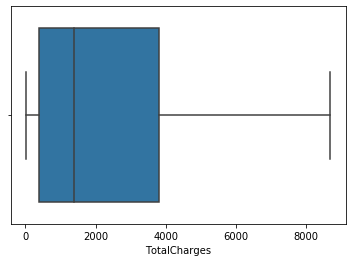

In [21]:
sns.boxplot(data[data['TotalCharges'] != ' ']['TotalCharges'].astype(float))

In [22]:
round(data[data['TotalCharges'] != ' ']['TotalCharges'].astype(float).mean(),2)

2283.3

In [23]:
# replacing the blank values with the mean

data['TotalCharges'].replace(to_replace=' ',value=round(data[data['TotalCharges'] != ' ']['TotalCharges'].astype(float).mean(),2),inplace=True)

In [24]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [25]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
# dropping the customerID column from the dataset

data.drop('customerID',axis=1,inplace=True)

In [27]:
# Summary Statistics for numerical data

data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300440
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [28]:
# Summary Statistics for categorical data

data.describe(include=object)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [29]:
# Checking the value counts of the different categorical fields

for x in data.select_dtypes(include='object'):
    print(data[x].value_counts(),'\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     28

In [30]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.150000,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.650000,Yes


### Removing/Checking for Outliers

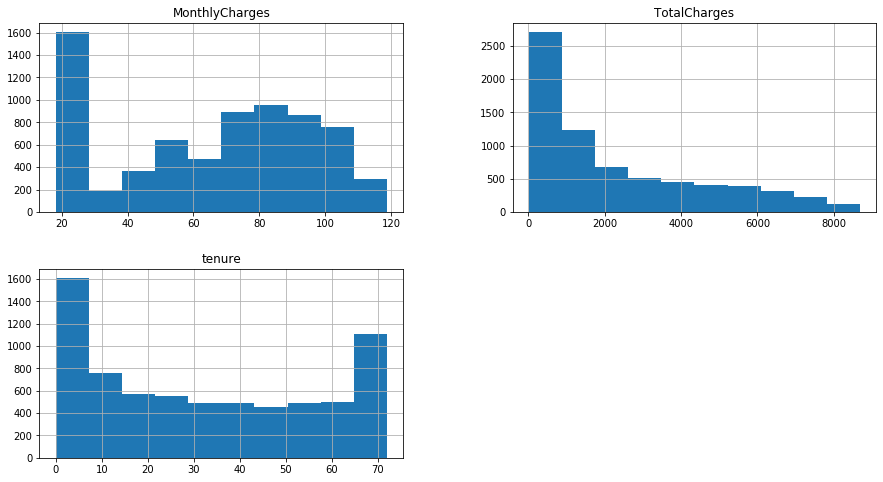

Skewness:


tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [31]:
# Checking the distribution of the numerical features

plt.rcParams['figure.figsize'] = [15,8]

data[['tenure','MonthlyCharges','TotalCharges']].hist()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')

data[['tenure','MonthlyCharges','TotalCharges']].skew()

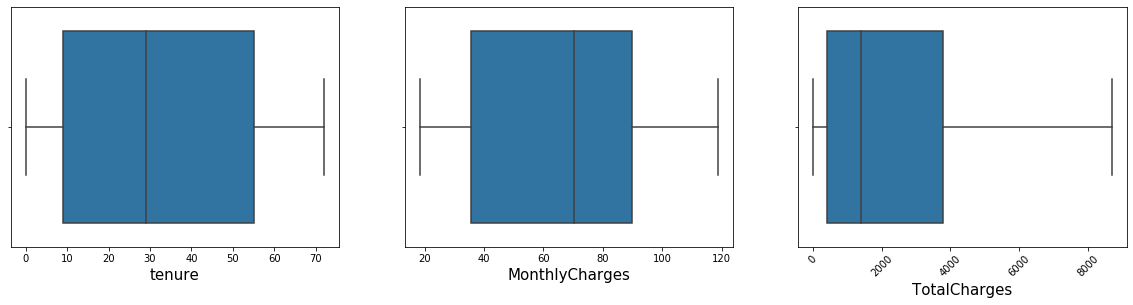

In [32]:
# checking the distribution of the numerical features

s=1
plt.figure(figsize=(20,15))

for x in data.select_dtypes(include=np.number):
    plt.subplot(3,3,s)
    sns.boxplot(data[x])
    plt.xlabel(x,fontsize=15)
    s+=1
plt.xticks(rotation=45)
plt.show()

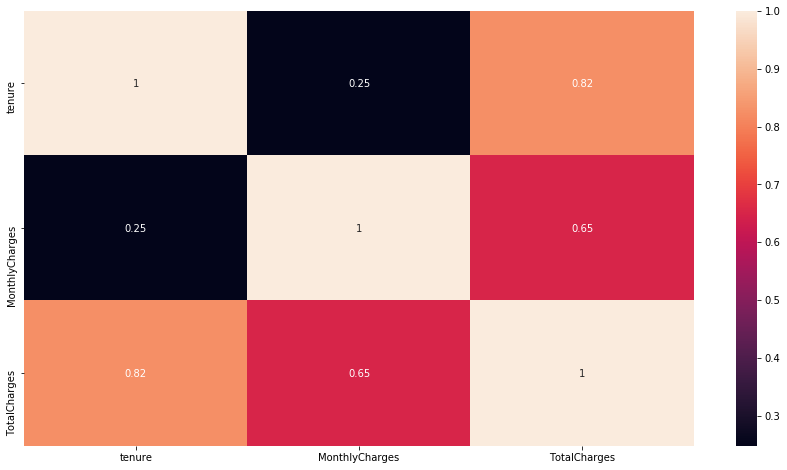

In [33]:
# Checking the correlation between the variables

sns.heatmap(data.corr(),annot=True)

Tenure and Total charges are relatively highly correlated. However we will retain both the columns for now and take a decision at a later stage based on the significance of the features

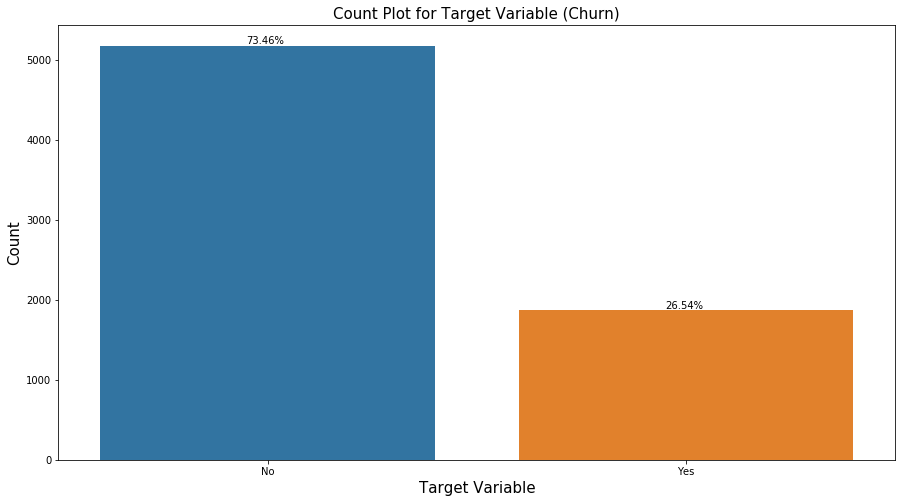

In [34]:
# Checking the distribution of the class labels for target variable

# consider only the target variable
df_target = data['Churn'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 20, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +20, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

There is a slight imbalance in the data, which we will address at a later stage post the base model has been built

#### Dummy Encoding

In [35]:
# Converting the churn column to 0 or 1

a = []

for i in data['Churn']:
    if i == 'Yes':
        a.append(1)
    else:
        a.append(0)

In [36]:
data['Churn'] = a

In [37]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [38]:
# sepearting the target variable and the features

data_target = data['Churn']

data_feature = data.drop('Churn', axis = 1)

In [39]:
# separating the numerical columns

data_num = data_feature.select_dtypes(include = [np.number])

data_num.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [40]:
# separating the categorical columns

data_cat = data_feature.select_dtypes(include = [np.object])

data_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [41]:
# n-1 dummy encoding the categorical variables

dummy_var = pd.get_dummies(data = data_cat, drop_first = True)

#### Scaling the data

In [42]:
# standardizing the data

X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(data_num)

data_num_scaled = pd.DataFrame(num_scaled, columns = data_num.columns)

In [43]:
# Getting the final concatenated dataframe of the features

X = pd.concat([data_num_scaled, dummy_var], axis = 1)

X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.173876,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.960399,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.195400,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Train - Test Split

In [44]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, data_target, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5634, 31)
y_train (5634,)
X_test (1409, 31)
y_test (1409,)


### Logistic Regression Base Model

In [45]:
logreg_base_model = sm.Logit(y_train.astype(float), X_train.astype(float)).fit()
print(logreg_base_model.summary())

Optimization terminated successfully.
         Current function value: 0.417210
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           23
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.2857
Time:                        17:11:56   Log-Likelihood:                -2350.6
converged:                       True   LL-Null:                       -3290.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6170   8.

##### From the base model we see that:

- The Log-Likelihood value is greater than LL-null suggesting that the features included have some significance in the model prediction

- We see that some of the features have a p-value greater than 0.05 and also have a 'nan' value, suggesting that these features are not adding to the effectiveness of the model

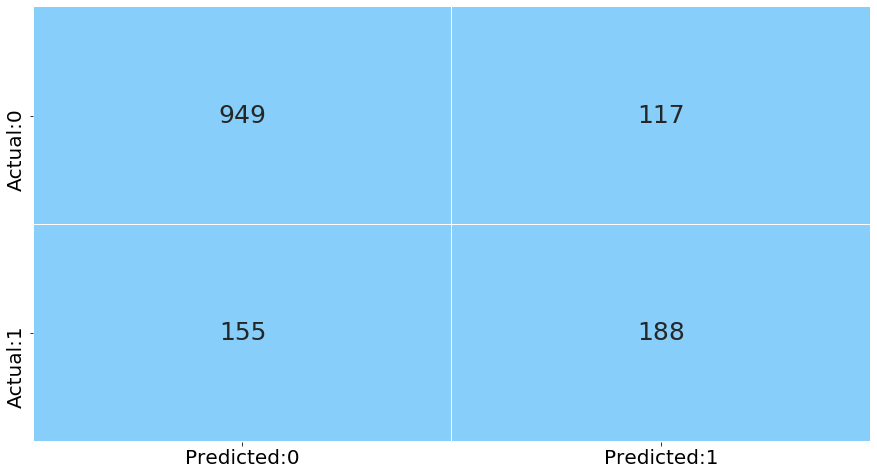

In [46]:
plot_confusion_matrix(logreg_base_model)

##### From the above confusion matrix, we see that there are:

- 949 True Negatives
- 188 True Positives
- 117 False Positives
- 155 False Negatives

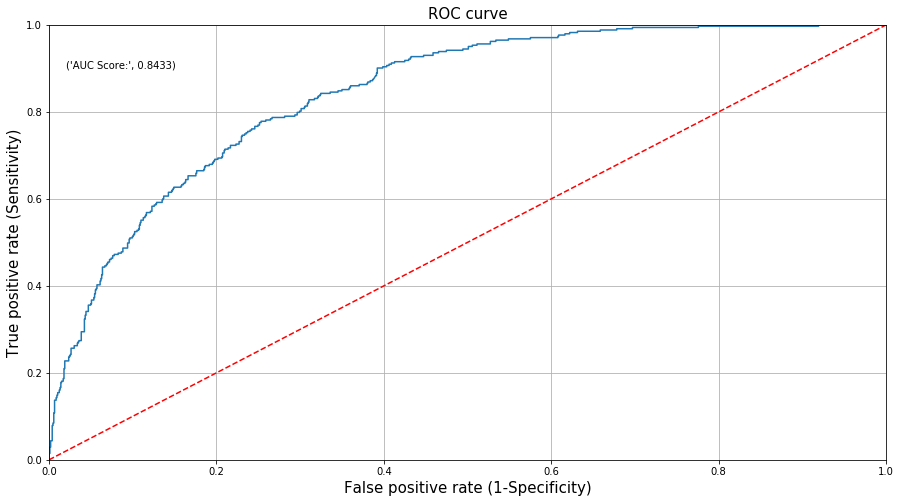

In [47]:
plot_roc(logreg_base_model)

In [48]:
update_final_score_card(logreg_base_model,'Base_Logistic_Regression_model')

In [49]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278


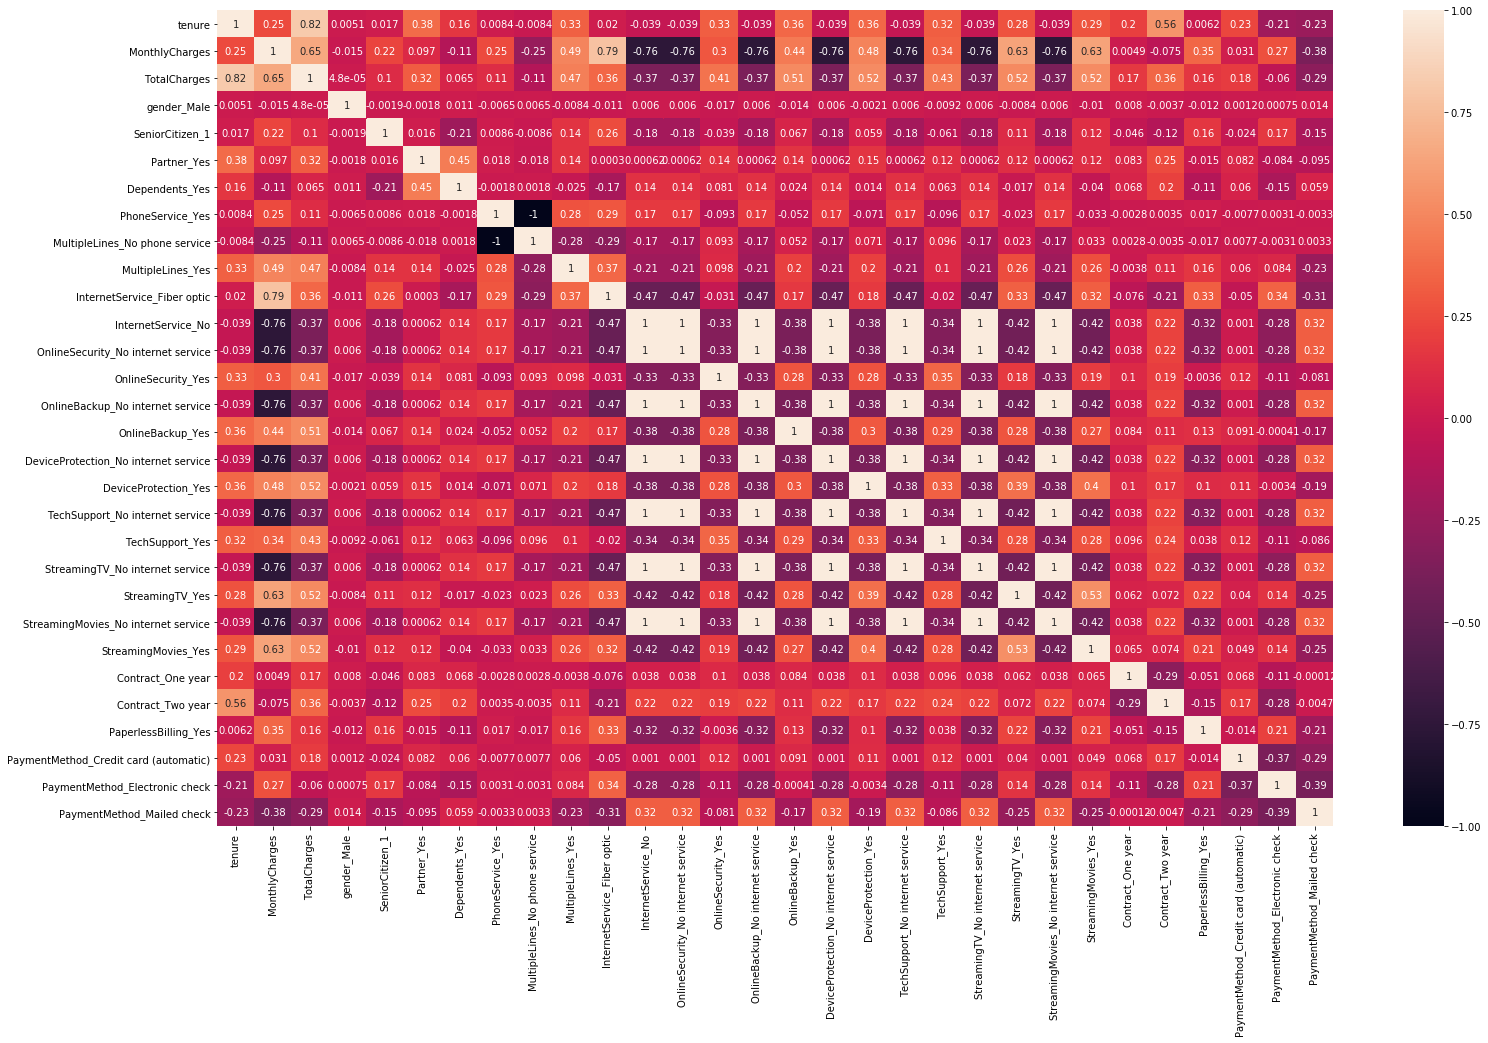

In [50]:
# checking the correlation among the features

plt.figure(figsize=(25,15))

sns.heatmap(X.drop('const',axis=1).corr(),annot=True)

In [51]:
# Using RFE to estimate the most significant features

X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

logreg = LogisticRegression()


rfe_model = RFE(estimator = logreg, n_features_to_select =15)
rfe_model = rfe_model.fit(X_train_rfe, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')


In [52]:
logreg_rfe_model = sm.Logit(y_train.astype(float), X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service',
       'OnlineBackup_No internet service', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']].astype(float)).fit()

print(logreg_rfe_model.summary())

Optimization terminated successfully.
         Current function value: 0.419300
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5621
Method:                           MLE   Df Model:                           12
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.2822
Time:                        17:11:59   Log-Likelihood:                -2362.3
converged:                       True   LL-Null:                       -3290.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.6493      0.155 

In [53]:
logreg_rfe_significant_model = sm.Logit(y_train.astype(float), X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']].astype(float)).fit()

print(logreg_rfe_significant_model.summary())

Optimization terminated successfully.
         Current function value: 0.418454
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5619
Method:                           MLE   Df Model:                           14
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.2836
Time:                        17:11:59   Log-Likelihood:                -2357.6
converged:                       True   LL-Null:                       -3290.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.2496      0.317    -10.259     

##### From the RFE Optimized model we see that:

- The Log-Likelihood value is greater than LL-null suggesting that the features included have some significance in the model prediction

- We see that all of the features selected are significant having p-value less than 0.05

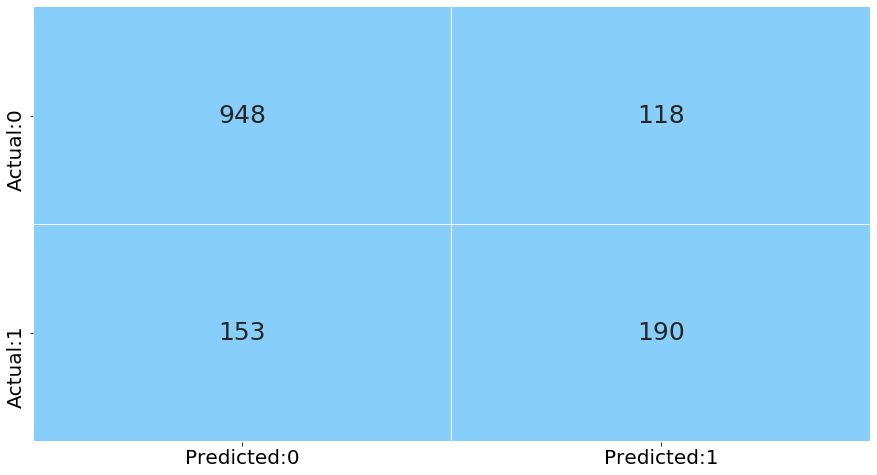

In [54]:
plot_confusion_matrix_rfe(logreg_rfe_significant_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 948 True Negatives
- 190 True Positives
- 118 False Positives
- 153 False Negatives

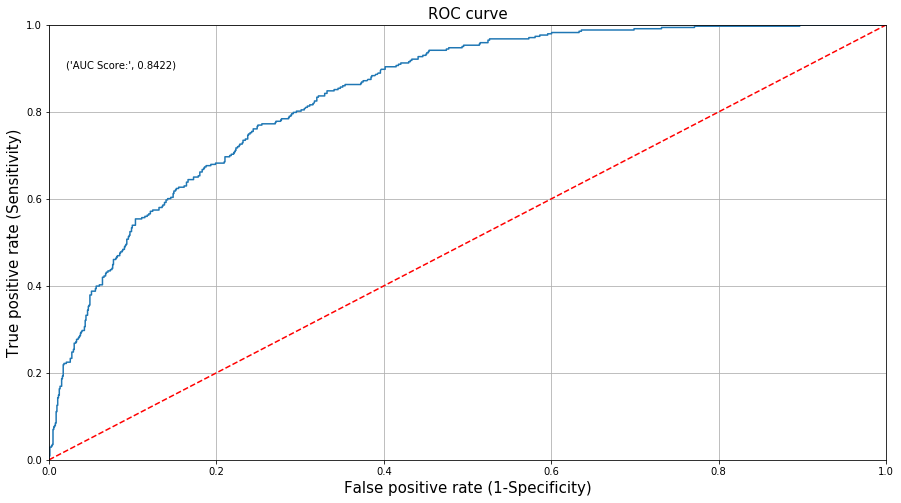

In [55]:
plot_roc_rfe(logreg_rfe_significant_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [56]:
update_final_score_card_rfe(logreg_rfe_significant_model,'RFE_Optimized_Logistic_Regression_model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [57]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226


### Optimum Value of Threshold

In [58]:
y_pred_prob_rfe = logreg_rfe_significant_model.predict(X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

In [59]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.769679,0.249531,0.292202,0.520148
1,0.772595,0.254221,0.287641,0.518373
2,0.766764,0.248593,0.294893,0.518171
3,0.766764,0.249531,0.293979,0.517233
4,0.760933,0.243902,0.301157,0.517031


In [60]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.29 else 1 for x in y_pred_prob_rfe]

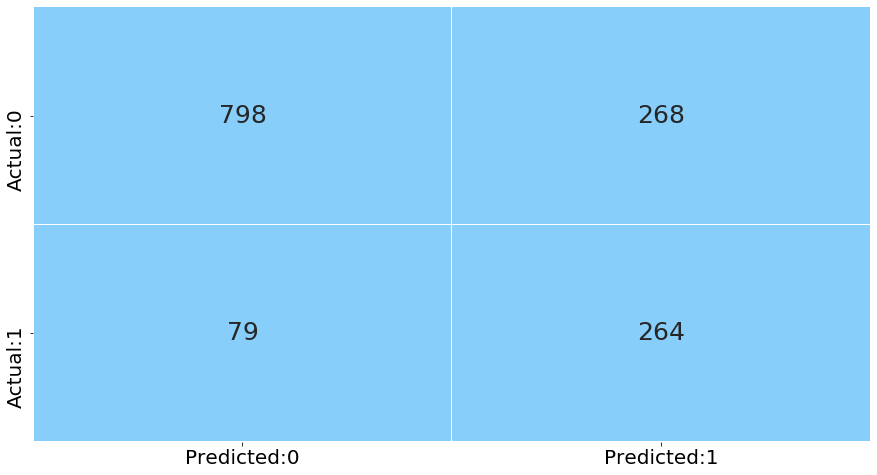

In [61]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

##### From the above confusion matrix, we see that there are:

- 798 True Negatives
- 264 True Positives
- 268 False Positives
- 79 False Negatives

In [62]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1066
           1       0.50      0.77      0.60       343

    accuracy                           0.75      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.81      0.75      0.77      1409



In [63]:
update_final_score_card_rfe_threshold(logreg_rfe_significant_model,'Threshold_Optimized_Logistic_Regression_Model',
                                     0.29,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

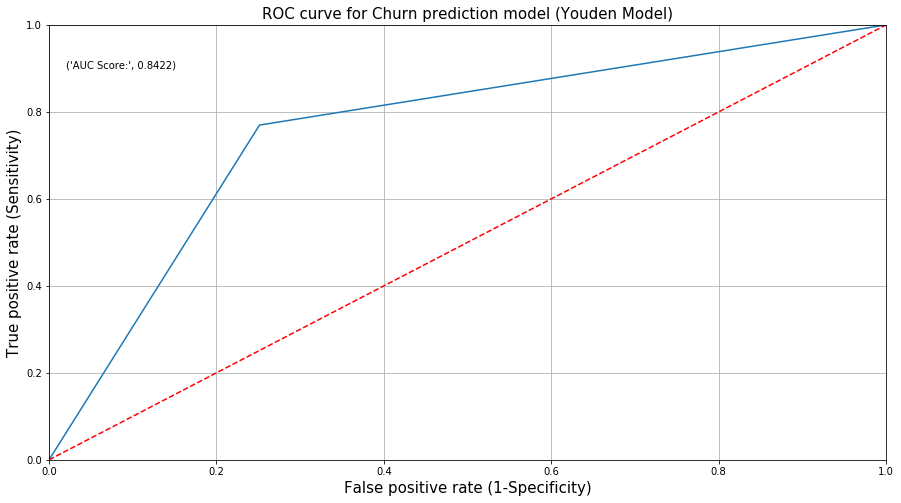

In [64]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_youden)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Churn prediction model (Youden Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

In [65]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226


### Base Gaussian Model

In [66]:
gnb_base = GaussianNB()
gnb_base.fit(X_train,y_train)

GaussianNB()

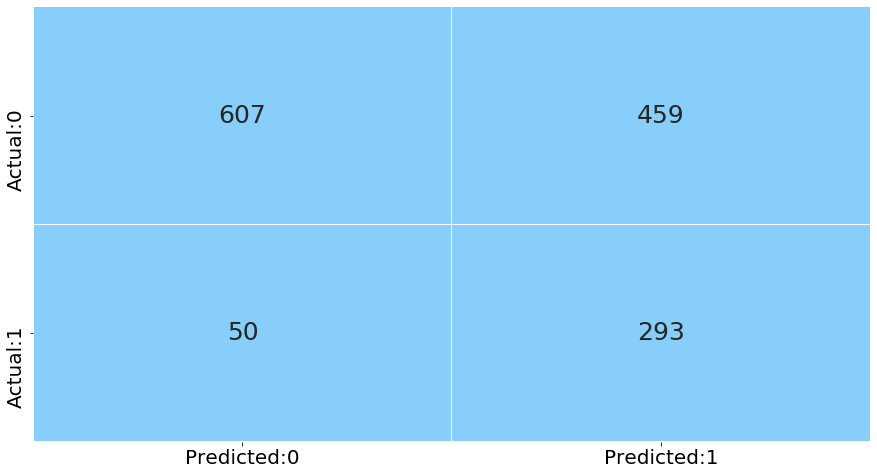

In [67]:
plot_confusion_matrix(gnb_base)

##### From the above confusion matrix, we see that there are:

- 607 True Negatives
- 293 True Positives
- 459 False Positives
- 50 False Negatives

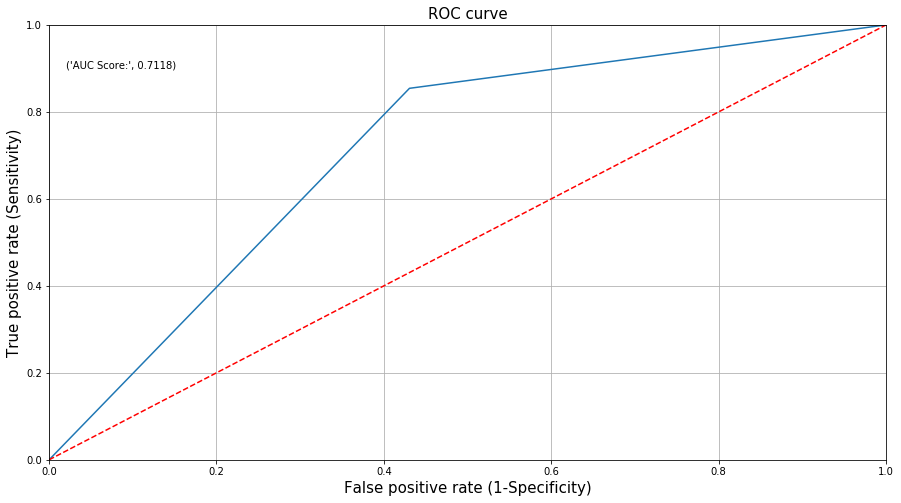

In [68]:
plot_roc(gnb_base)

In [69]:
update_final_score_card(gnb_base,'Base Gaussian Model')
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823


### RFE optimized Gaussian Model

In [70]:
gnb_RFE = GaussianNB()
gnb_RFE.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']],y_train)

GaussianNB()

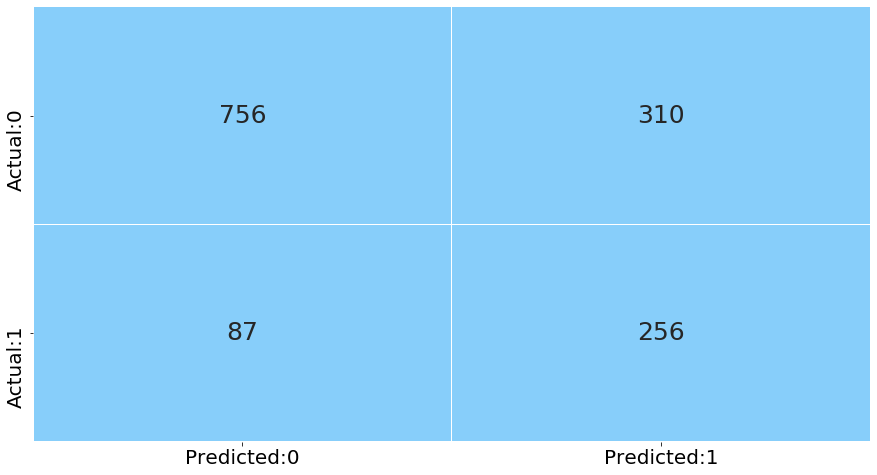

In [71]:
plot_confusion_matrix_rfe(gnb_RFE,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 756 True Negatives
- 256 True Positives
- 310 False Positives
- 87 False Negatives

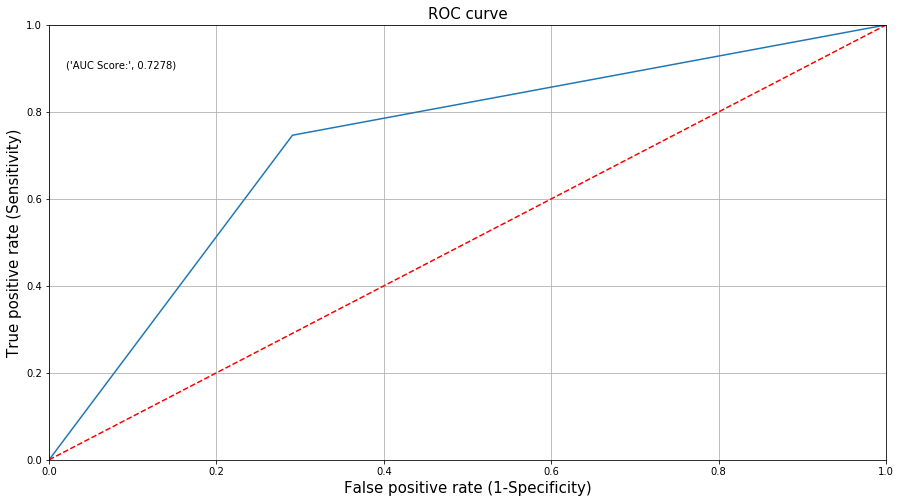

In [72]:
plot_roc_rfe(gnb_RFE,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [73]:
update_final_score_card_rfe(gnb_RFE,'RFE_Optimized_Gaussian_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [74]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774


### Base KNN Model

In [75]:
knn_base = KNeighborsClassifier(n_neighbors=3)
knn_base.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

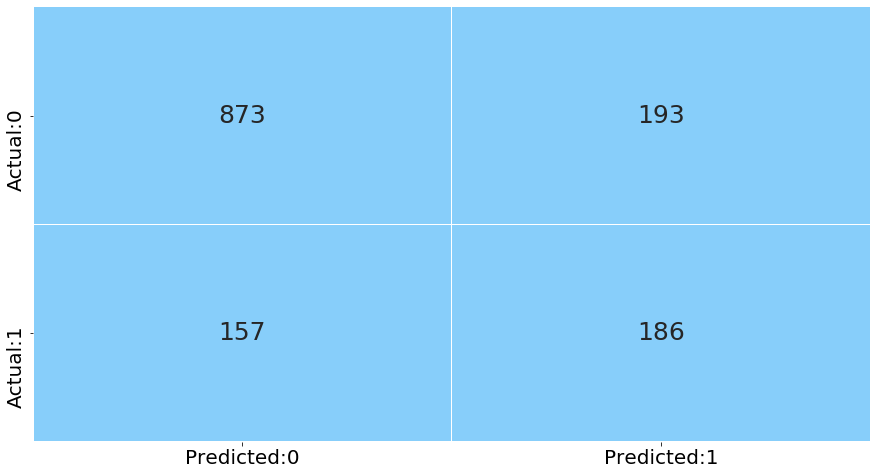

In [76]:
plot_confusion_matrix(knn_base)

##### From the above confusion matrix, we see that there are:

- 873 True Negatives
- 186 True Positives
- 193 False Positives
- 157 False Negatives

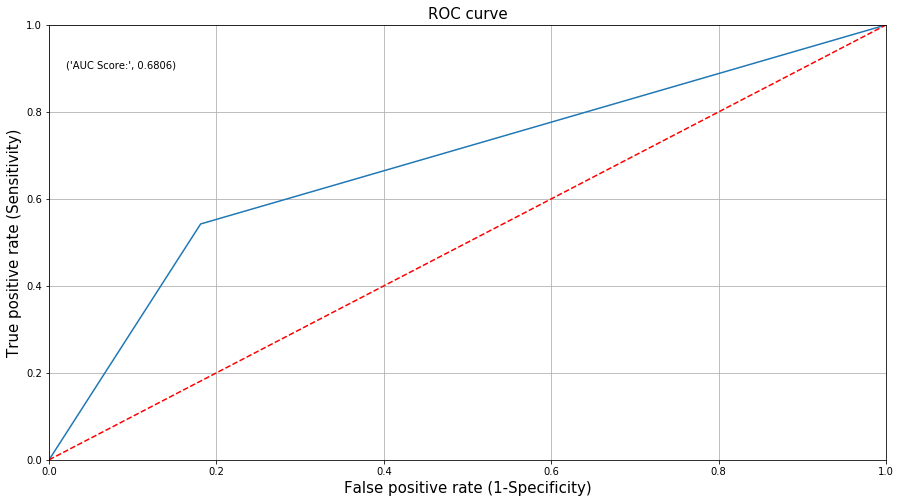

In [77]:
plot_roc(knn_base)

In [78]:
update_final_score_card(knn_base,'Base KNN Model')

In [79]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612


### RFE Optimized KNN Model

In [80]:
knn_rfe = KNeighborsClassifier(n_neighbors=3)
knn_rfe.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']],y_train)

KNeighborsClassifier(n_neighbors=3)

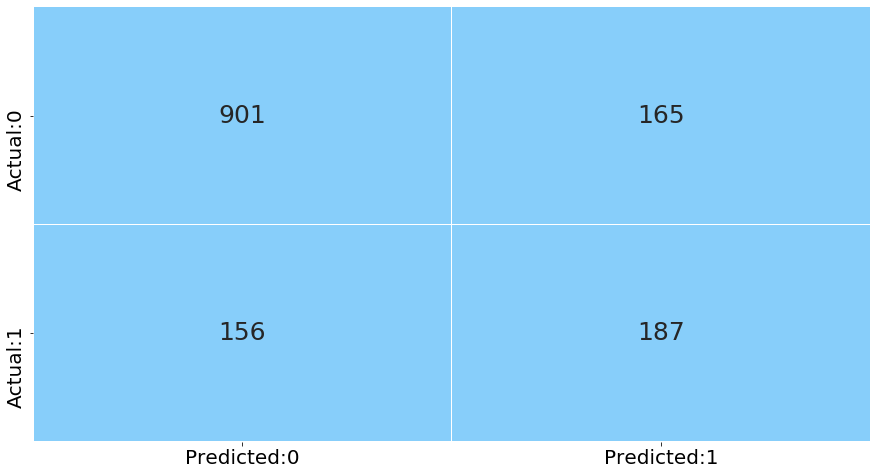

In [81]:
plot_confusion_matrix_rfe(knn_rfe,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 901 True Negatives
- 187 True Positives
- 165 False Positives
- 156 False Negatives

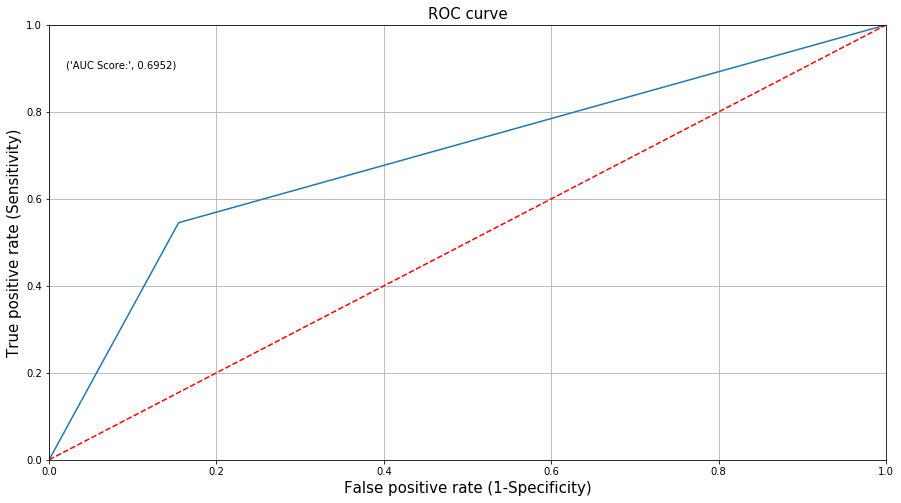

In [82]:
plot_roc_rfe(knn_rfe,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [83]:
update_final_score_card_rfe(knn_rfe,'RFE_Optimized_KNN_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [84]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203


### GridSearch for KNN

In [85]:
tuned_parameters = {'n_neighbors':np.arange(1,25,2),'metric':['hamming','euclidean','manhattan']}

knn_gs = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_gs,param_grid = tuned_parameters,cv = 5,scoring = 'accuracy')

knn_grid.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']],y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [86]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 23}

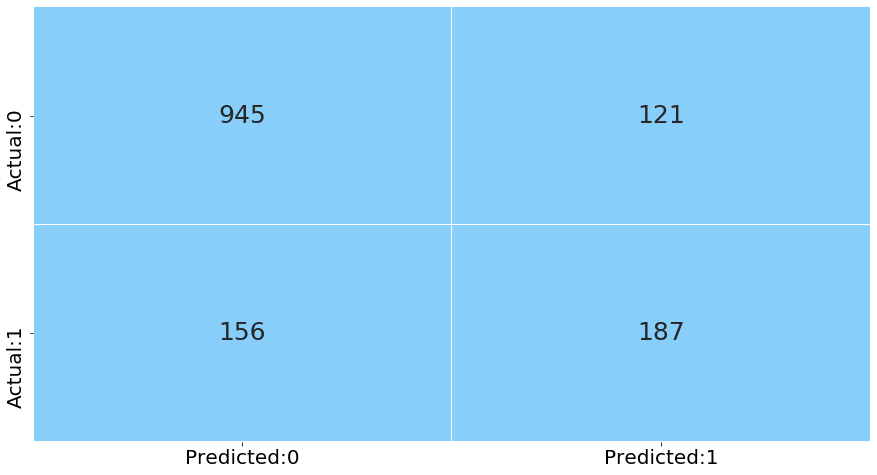

In [87]:
plot_confusion_matrix_rfe(knn_grid,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 945 True Negatives
- 187 True Positives
- 121 False Positives
- 156 False Negatives

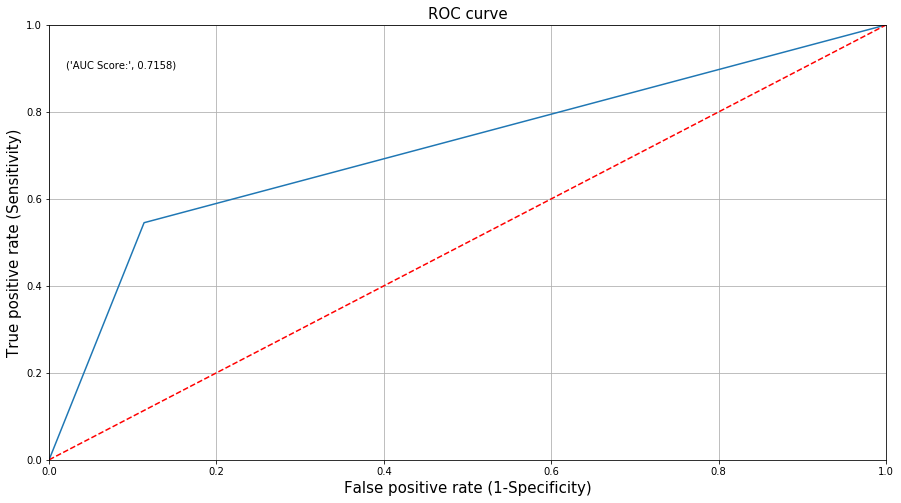

In [88]:
plot_roc_rfe(knn_grid,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [89]:
update_final_score_card_rfe(knn_grid,'GridSearch_Optimized_KNN_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [90]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841


### Base Decision Tree Model

In [91]:
decision_tree_base_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_base = decision_tree_base_classification.fit(X_train, y_train)

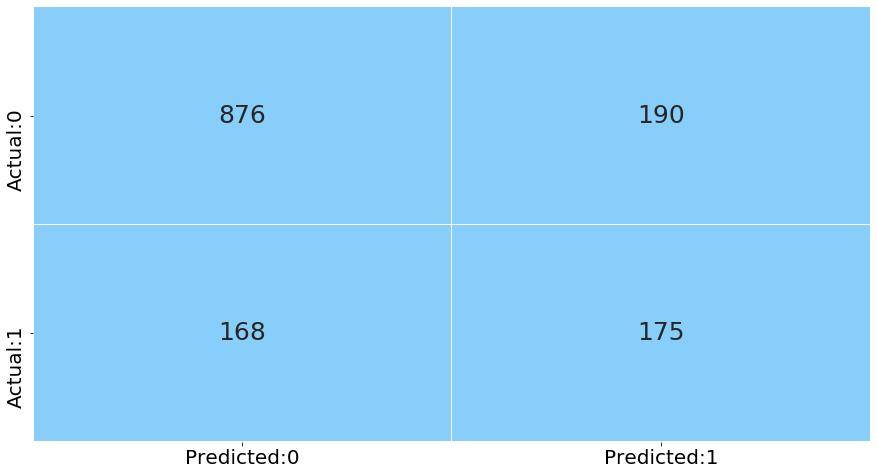

In [92]:
plot_confusion_matrix(decision_tree_base)

##### From the above confusion matrix, we see that there are:

- 876 True Negatives
- 175 True Positives
- 190 False Positives
- 168 False Negatives

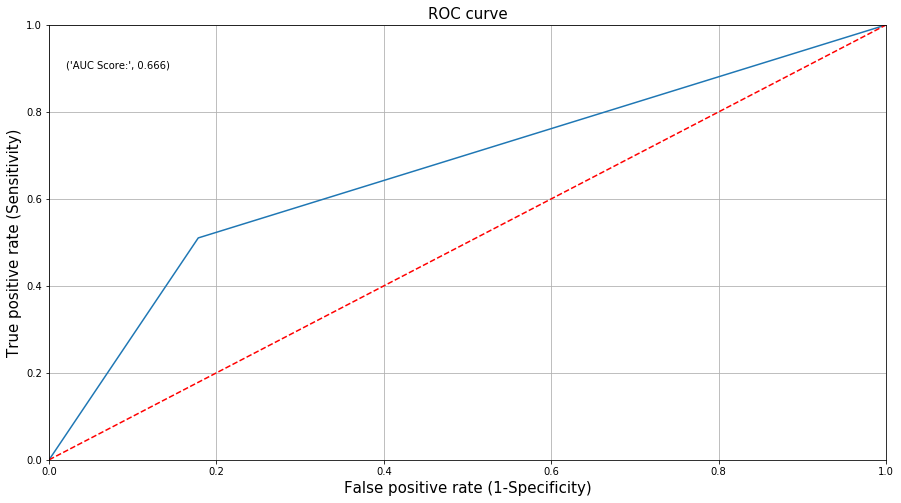

In [93]:
plot_roc(decision_tree_base)

In [94]:
update_final_score_card(decision_tree_base,'Base Decision Tree Model')

In [95]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984


### RFE Optimized Decision Tree Model

In [96]:
decision_tree_rfe_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_rfe = decision_tree_rfe_classification.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

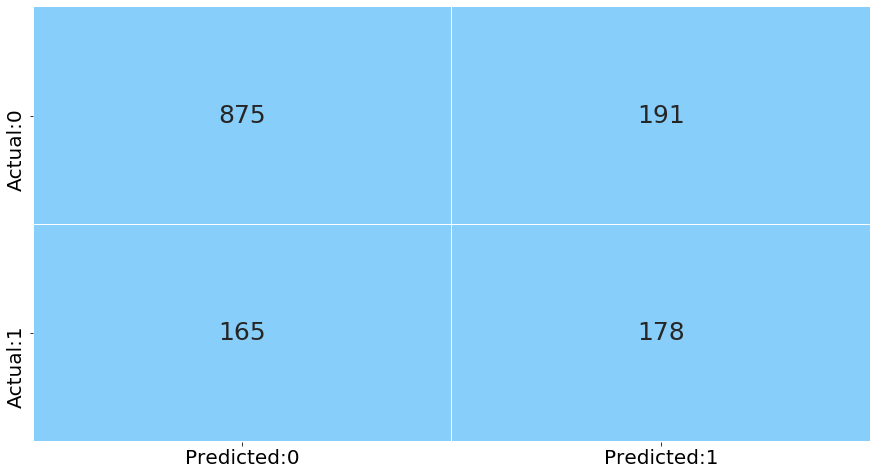

In [97]:
plot_confusion_matrix_rfe(decision_tree_rfe,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 875 True Negatives
- 178 True Positives
- 191 False Positives
- 165 False Negatives

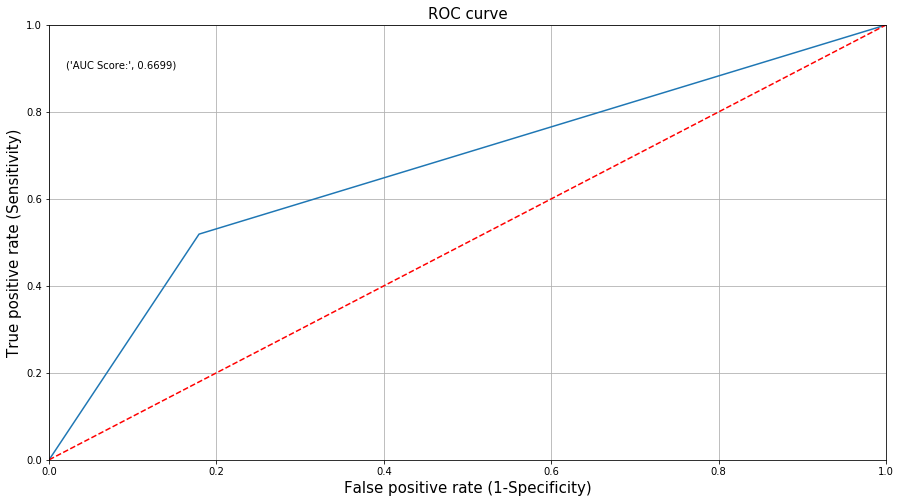

In [98]:
plot_roc_rfe(decision_tree_rfe,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [99]:
update_final_score_card_rfe(decision_tree_rfe,'RFE_Optimized_Decision_Tree_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [100]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized Decision Tree Model

In [101]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification_gs = DecisionTreeClassifier(random_state = 10)

tree_grid_gs = GridSearchCV(estimator = decision_tree_classification_gs, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid_gs.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [102]:
dt_model_gs = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model = dt_model_gs.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

In [103]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

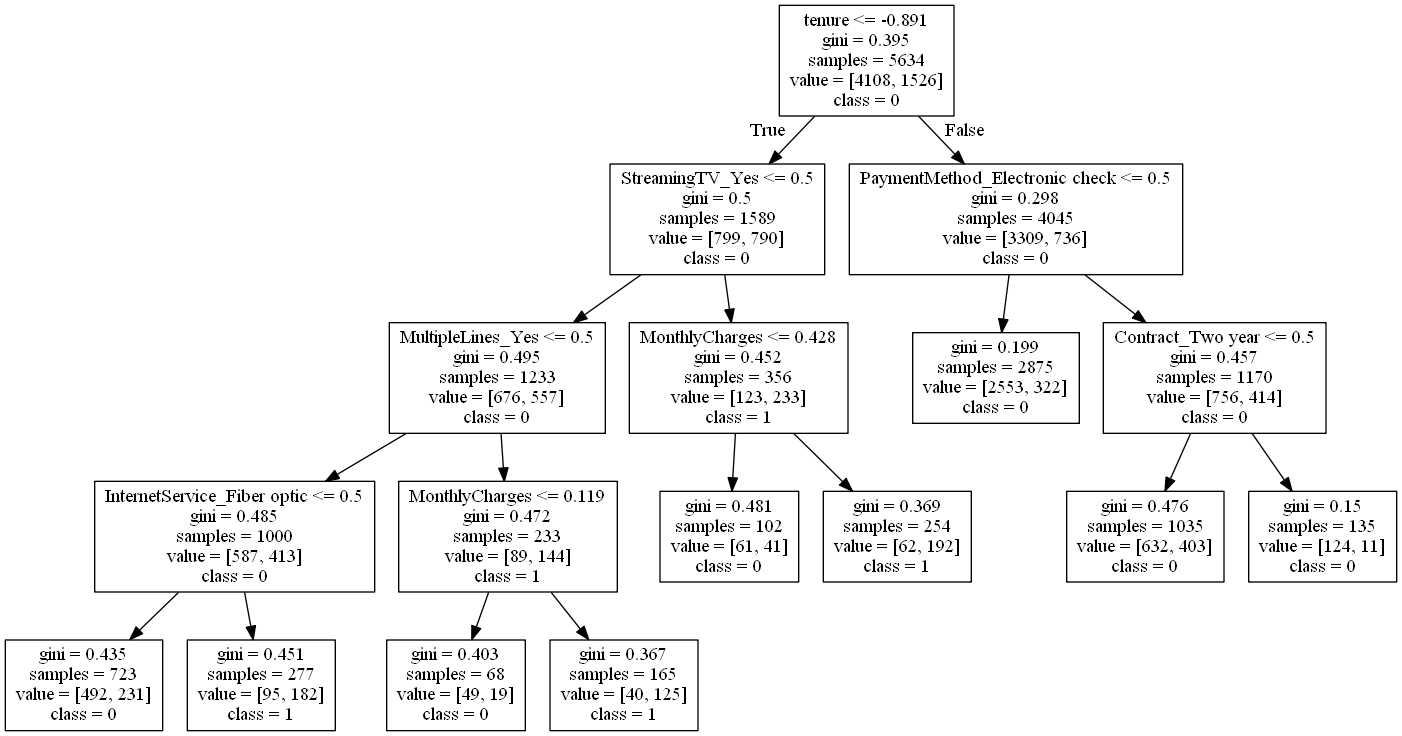

In [104]:
# save the column names in 'labels'
labels = ['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

# double-click on the image below to get an expanded view

In [105]:
dt_train_pred = dt_model.predict(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [106]:
print(classification_report(y_train, dt_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4108
           1       0.72      0.33      0.45      1526

    accuracy                           0.78      5634
   macro avg       0.75      0.64      0.66      5634
weighted avg       0.77      0.78      0.75      5634



In [107]:
dt_test_pred = dt_model.predict(X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [108]:
print(classification_report(y_test, dt_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1066
           1       0.66      0.29      0.40       343

    accuracy                           0.79      1409
   macro avg       0.73      0.62      0.64      1409
weighted avg       0.77      0.79      0.76      1409



- From the above train and test results, we see that the performance metric values are more or less similar, which suggests that the overfitting which is inherent in decision trees has been avoided, by optimizing the hyperparameters

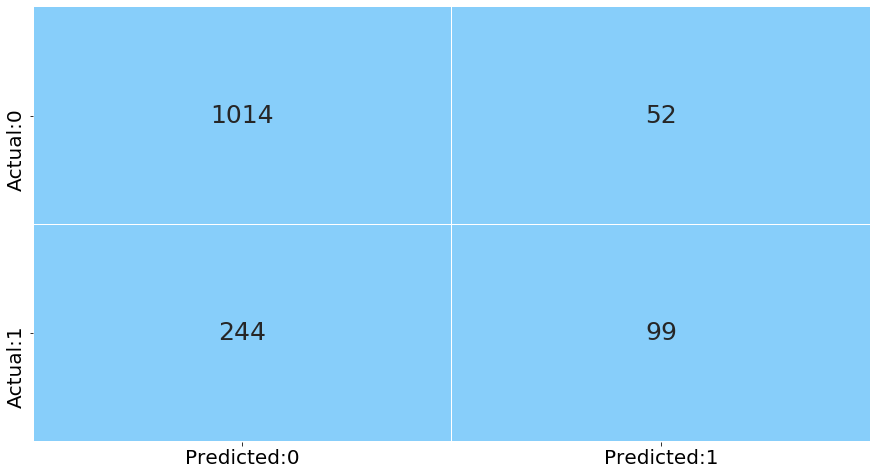

In [109]:
plot_confusion_matrix_rfe(dt_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 1014 True Negatives
- 99 True Positives
- 52 False Positives
- 244 False Negatives

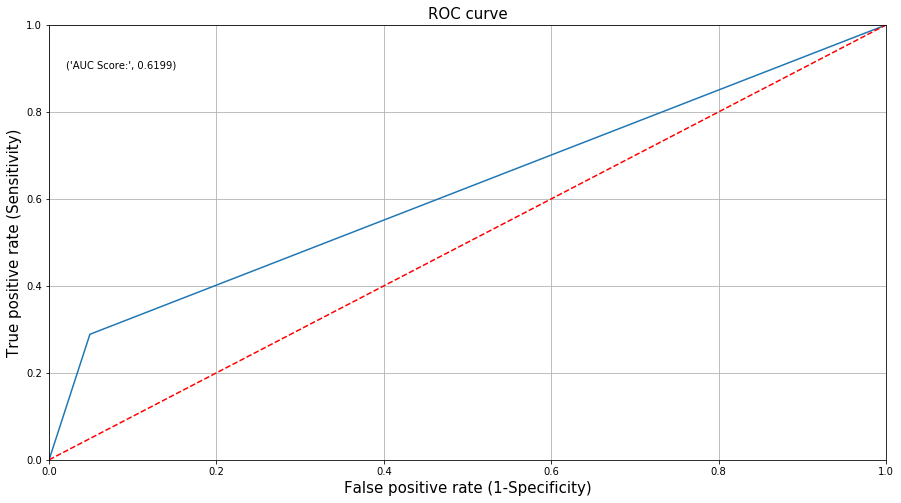

In [110]:
plot_roc_rfe(dt_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [111]:
update_final_score_card_rfe(dt_model,'GridSearch_Optimized_Decision_Tree_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [112]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### Base Random Forest Model

In [113]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_base_model = rf_classification.fit(X_train, y_train)

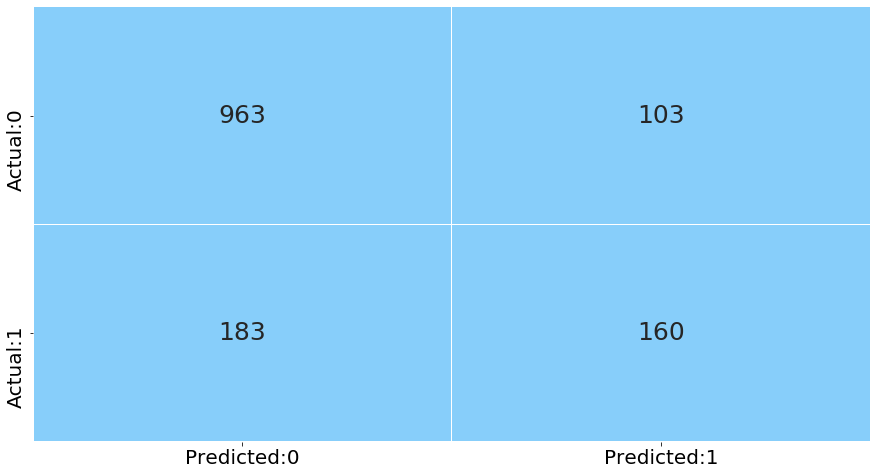

In [114]:
plot_confusion_matrix(rf_base_model)

##### From the above confusion matrix, we see that there are:

- 963 True Negatives
- 160 True Positives
- 103 False Positives
- 183 False Negatives

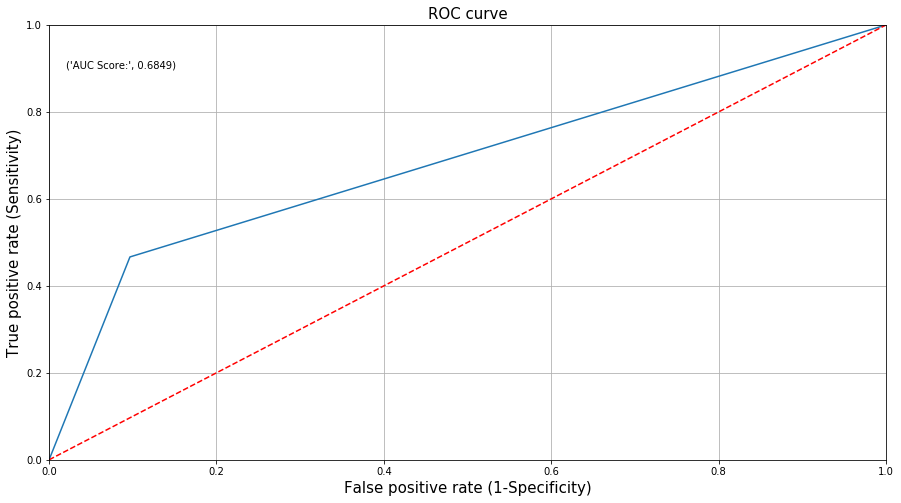

In [115]:
plot_roc(rf_base_model)

In [116]:
update_final_score_card(rf_base_model,'Base_Random_Forest_Model')

In [117]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### RFE Optimized Random Forest Model

In [118]:
rf_classification_rfe = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_rfe_model = rf_classification_rfe.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

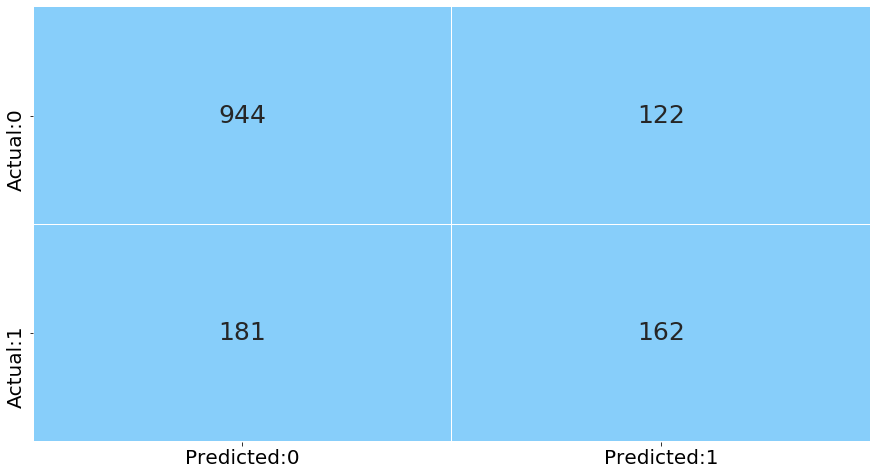

In [119]:
plot_confusion_matrix_rfe(rf_rfe_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 944 True Negatives
- 162 True Positives
- 122 False Positives
- 181 False Negatives

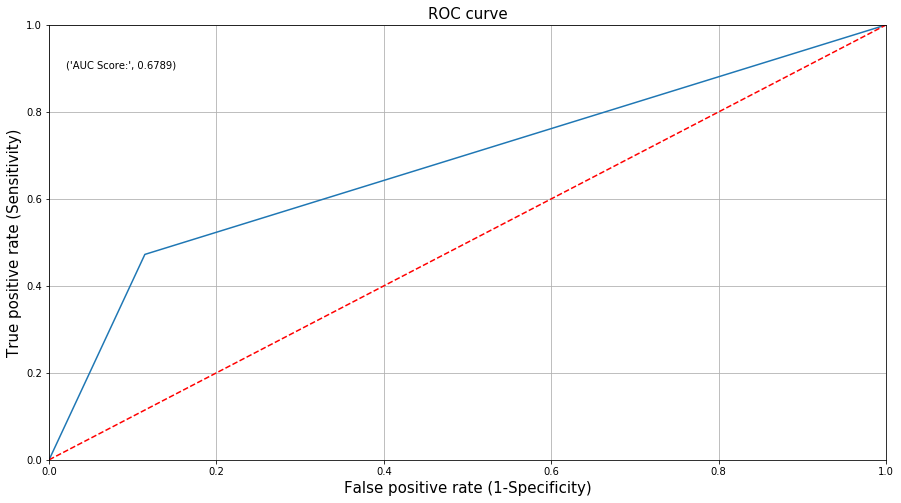

In [120]:
plot_roc_rfe(rf_rfe_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [121]:
update_final_score_card_rfe(rf_rfe_model,'RFE_Optimized_Random_Forest_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [122]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized Random Forest Model

In [123]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [3,6,9,12,15,18],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification_gs = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification_gs, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 12} 



In [124]:
rf_model_gs = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model_gs.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

In [125]:
rf_train_pred = rf_model.predict(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [126]:
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4108
           1       0.69      0.47      0.56      1526

    accuracy                           0.80      5634
   macro avg       0.76      0.69      0.71      5634
weighted avg       0.79      0.80      0.78      5634



In [127]:
rf_test_pred = rf_model.predict(X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [128]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1066
           1       0.62      0.45      0.52       343

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.79      0.80      0.79      1409



- From the above train and test results, we see that the performance metric values are more or less similar, which suggests that the overfitting which is inherent in decision trees has been avoided, by aggregating the output with the help of bagging via RandomForest Algorithm

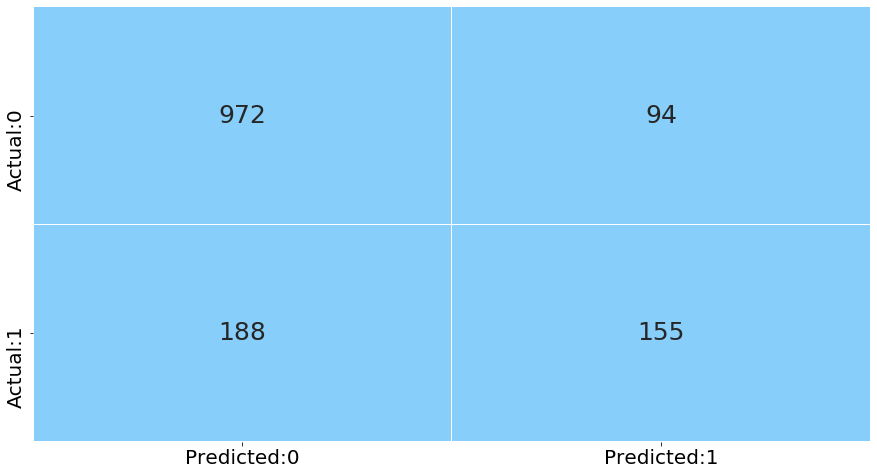

In [129]:
plot_confusion_matrix_rfe(rf_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 972 True Negatives
- 155 True Positives
- 94 False Positives
- 188 False Negatives

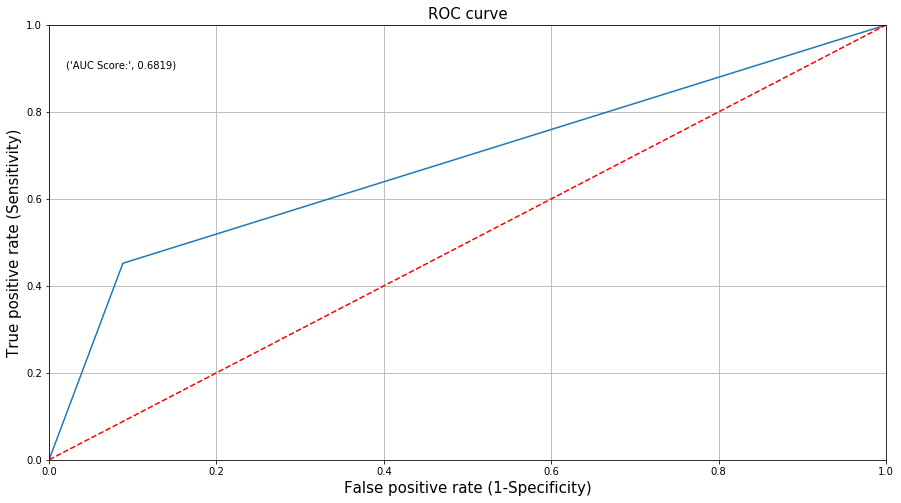

In [130]:
plot_roc_rfe(rf_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No', 'SeniorCitizen_1', 'PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']])

In [131]:
update_final_score_card_rfe(rf_model,'GridSearch_Optimized_Random_Forest_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [132]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### Feature Importance using Random Forest Model

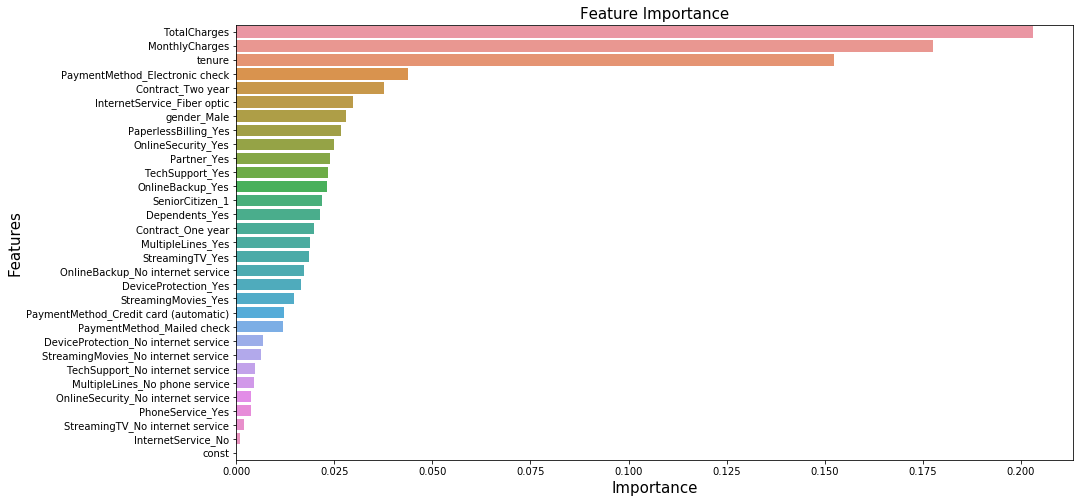

In [133]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_base_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### XGBoost Base Model

In [134]:
xgb_base_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_base_model.fit(X_train, y_train)

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

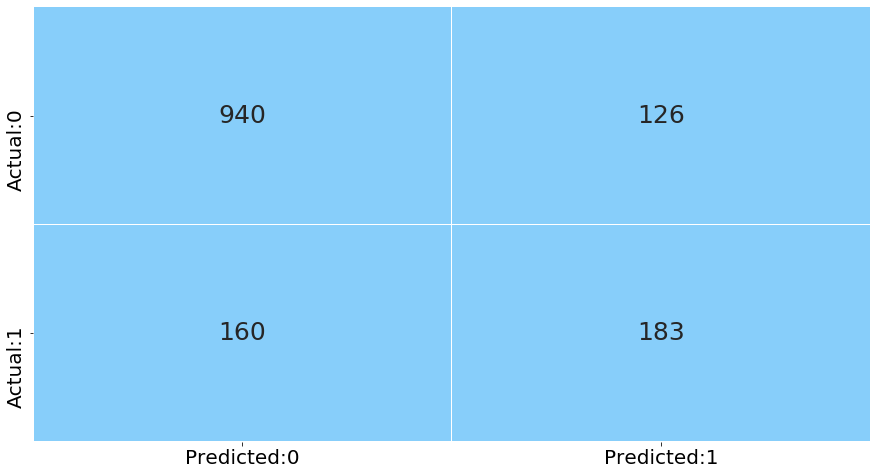

In [135]:
plot_confusion_matrix(xgb_base_model)

##### From the above confusion matrix, we see that there are:

- 940 True Negatives
- 183 True Positives
- 126 False Positives
- 160 False Negatives

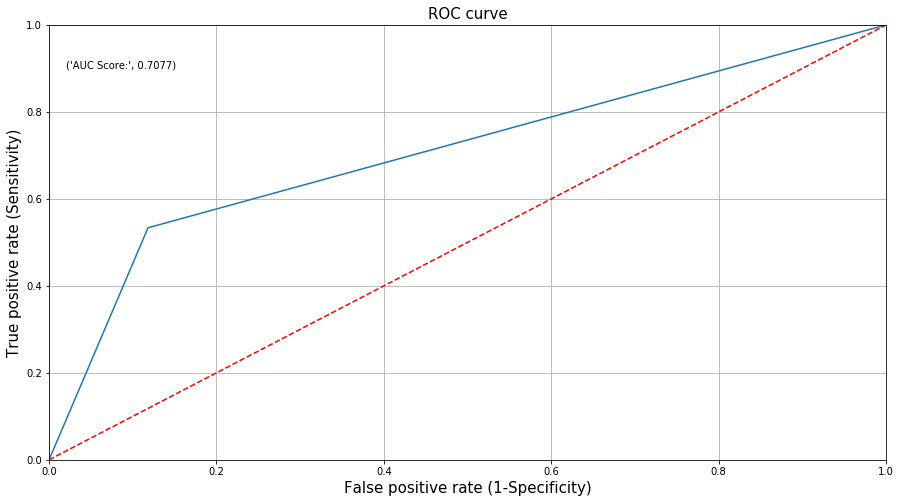

In [136]:
plot_roc(xgb_base_model)

In [137]:
update_final_score_card(xgb_base_model,'Base_XGBoost_Model')

In [138]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### RFE Optimized XGBoost Model

In [139]:
xgb_rfe_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_rfe_model.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

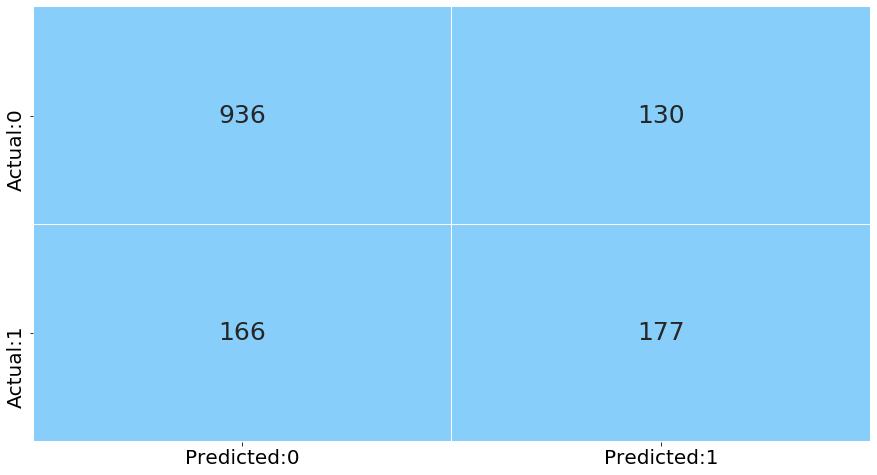

In [140]:
plot_confusion_matrix_rfe(xgb_rfe_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 936 True Negatives
- 177 True Positives
- 130 False Positives
- 166 False Negatives

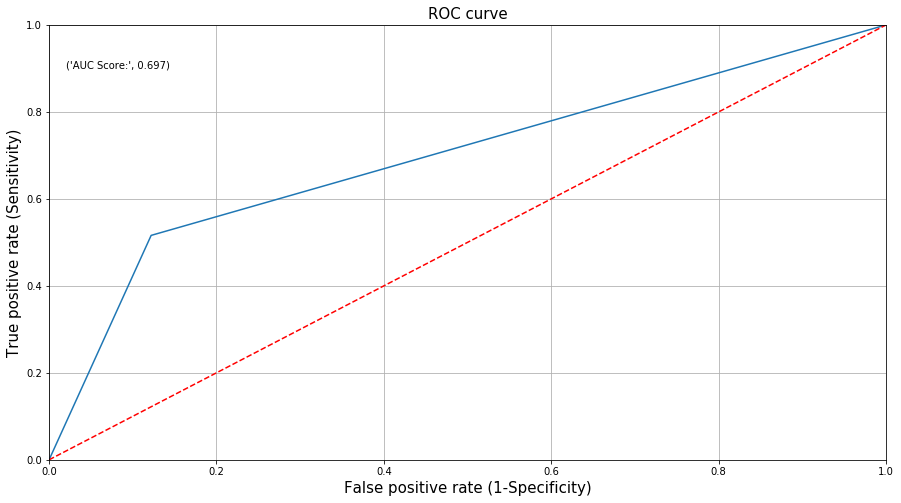

In [141]:
plot_roc_rfe(xgb_rfe_model,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [142]:
update_final_score_card_rfe(xgb_rfe_model,'RFE_Optimized_XGBoost_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [143]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized XGBoost Model

In [144]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model_gs = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model_gs, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [145]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model_grid_optimized = xgb_grid_model.fit(X_train[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']], y_train)

[17:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


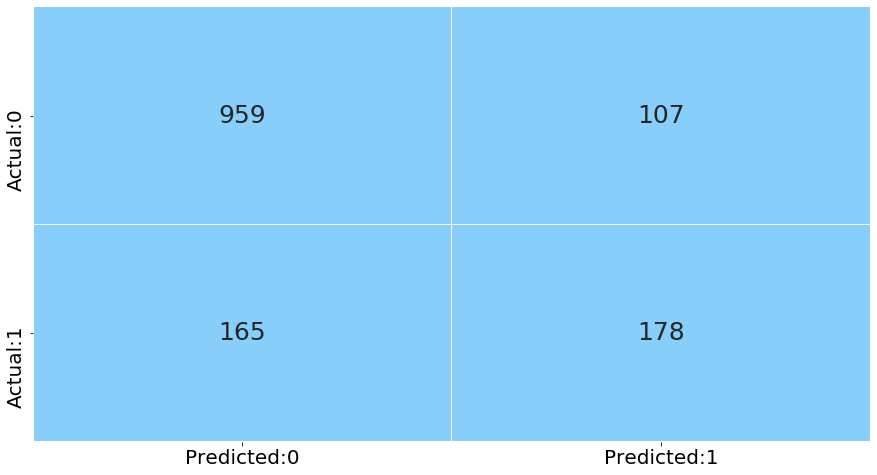

In [146]:
plot_confusion_matrix_rfe(xgb_model_grid_optimized,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

##### From the above confusion matrix, we see that there are:

- 959 True Negatives
- 178 True Positives
- 107 False Positives
- 165 False Negatives

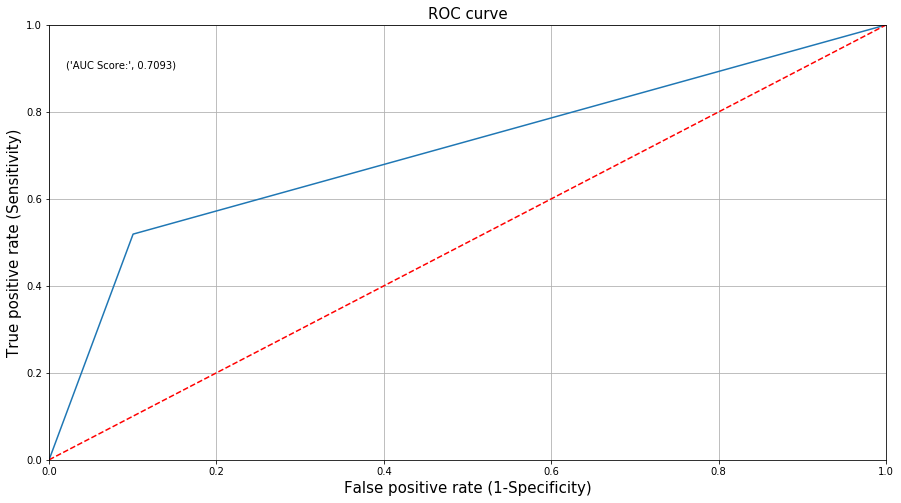

In [147]:
plot_roc_rfe(xgb_model_grid_optimized,X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [148]:
update_final_score_card_rfe(xgb_model_grid_optimized,'GridSearch_Optimized_XGBoost_Model',X_test[['const','tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic','InternetService_No','SeniorCitizen_1','PhoneService_Yes',
       'StreamingTV_Yes','StreamingMovies_Yes', 'Contract_One year','Contract_Two year',
       'PaperlessBilling_Yes','PaymentMethod_Electronic check']])

In [149]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### Feature Importance using XGBoost Model

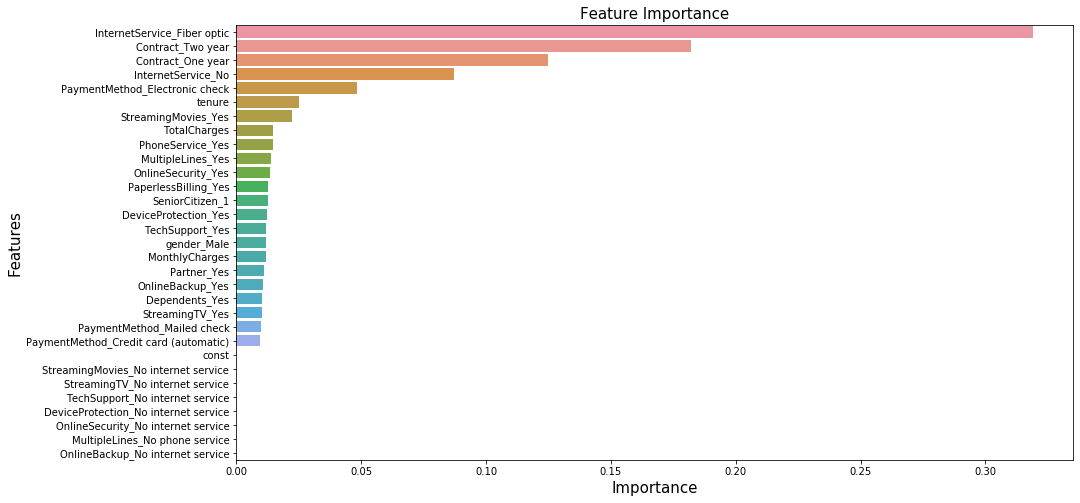

In [150]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_base_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## Balancing the Dataset

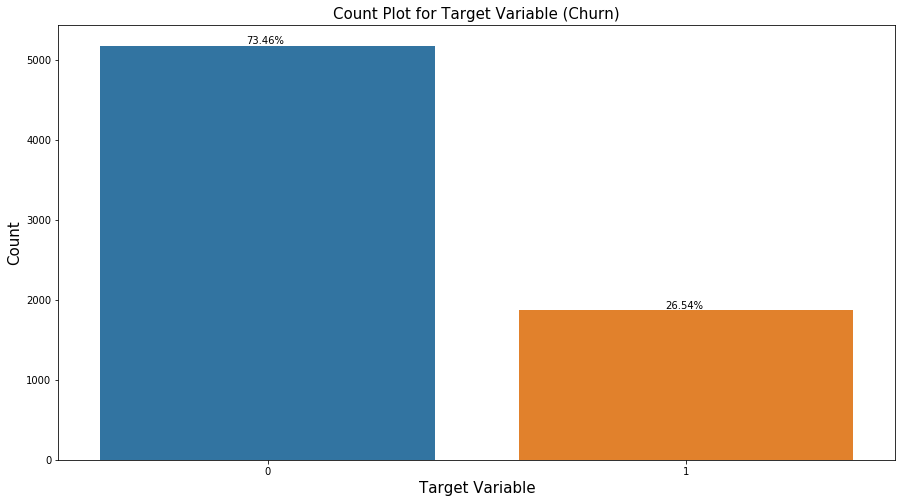

In [151]:
# Checking the distribution of the class labels for target variable

# consider only the target variable
df_target = data['Churn'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 20, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +20, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [152]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_sm, Y_sm = smote.fit_resample(X_train, y_train)
Y_sm.value_counts()

1    4108
0    4108
Name: Churn, dtype: int64

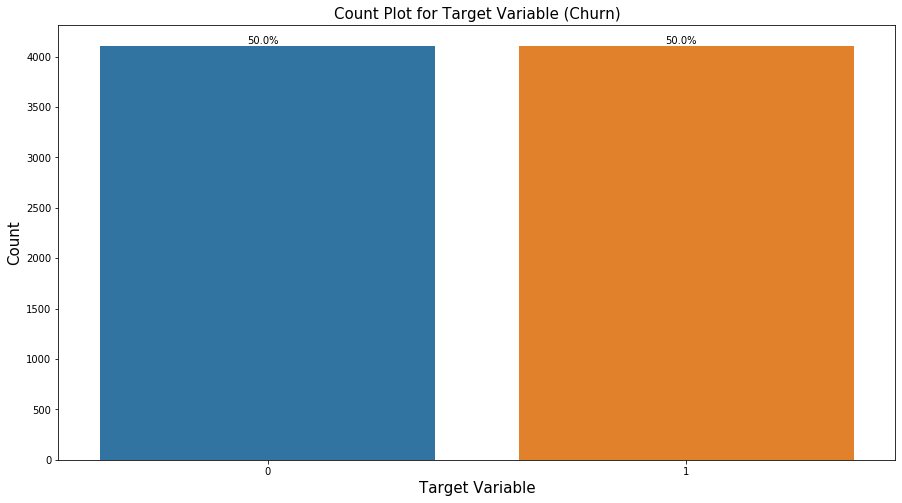

In [153]:
# Checking the distribution of the class labels for target variable

# consider only the target variable
df_target = Y_sm.copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 20, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +20, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [154]:
Xb_train_rfe = X_sm.iloc[:,1:]
Xb_test_rfe = X_test.iloc[:,1:]

logreg_bal = LogisticRegression()


rfe_model = RFE(estimator = logreg_bal, n_features_to_select =15)
rfe_model = rfe_model.fit(X_sm, Y_sm)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_sm.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['MonthlyCharges', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year'],
      dtype='object')


### RFE Optimized Logistic Regression Model for Balanced Data

In [155]:
balanced_logreg_rfe_significant_model = sm.Logit(Y_sm.astype(float), X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']].astype(float)).fit()

print(balanced_logreg_rfe_significant_model.summary())

Optimization terminated successfully.
         Current function value: 0.415796
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8216
Model:                          Logit   Df Residuals:                     8197
Method:                           MLE   Df Model:                           18
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.4001
Time:                        17:32:08   Log-Likelihood:                -3416.2
converged:                       True   LL-Null:                       -5694.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   17.0935      0.8

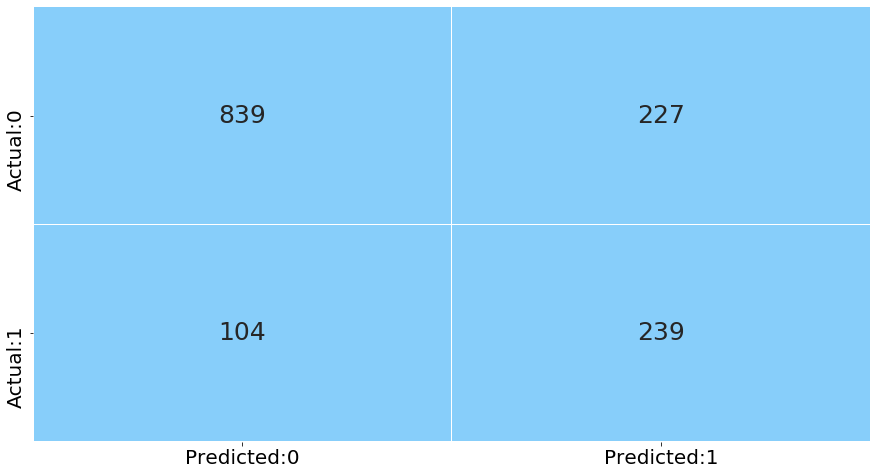

In [156]:
plot_confusion_matrix_balanced_rfe(balanced_logreg_rfe_significant_model,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

##### From the above confusion matrix, we see that there are:

- 839 True Negatives
- 239 True Positives
- 227 False Positives
- 104 False Negatives

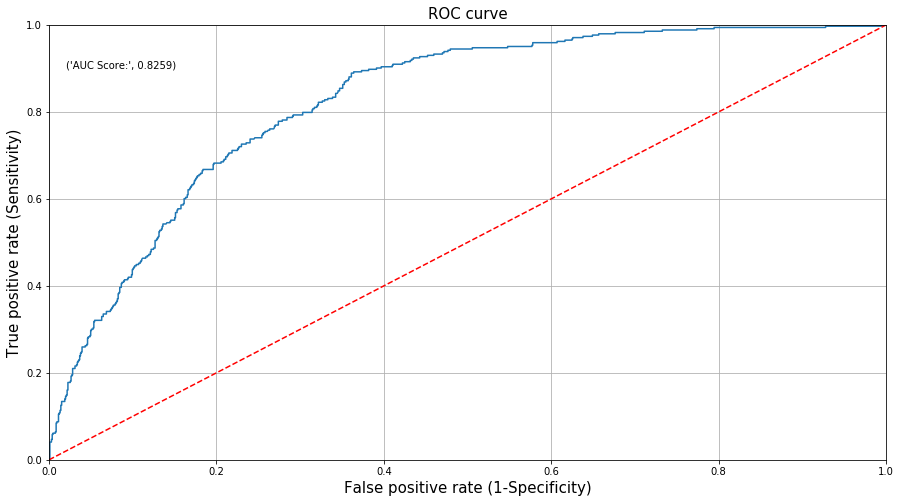

In [157]:
plot_roc_balanced_rfe(balanced_logreg_rfe_significant_model,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [158]:
update_final_score_card_balanced_rfe(balanced_logreg_rfe_significant_model,'RFE_Optimized_Logistice_Regression_Model_Balanced',
                                    X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [159]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### RFE Optimized Gaussian Model for Balanced Data

In [160]:
gnb_balanced_RFE = GaussianNB()
gnb_balanced_RFE.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']],Y_sm)

GaussianNB()

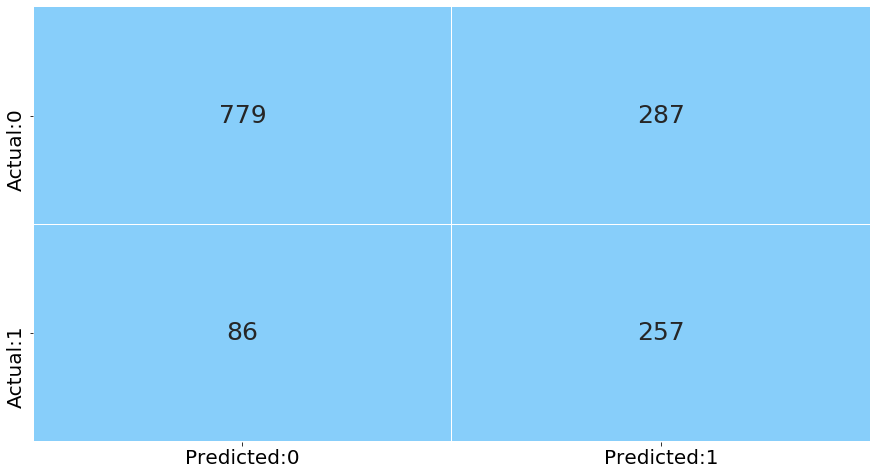

In [161]:
plot_confusion_matrix_balanced_rfe(gnb_balanced_RFE,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

##### From the above confusion matrix, we see that there are:

- 779 True Negatives
- 257 True Positives
- 287 False Positives
- 86 False Negatives

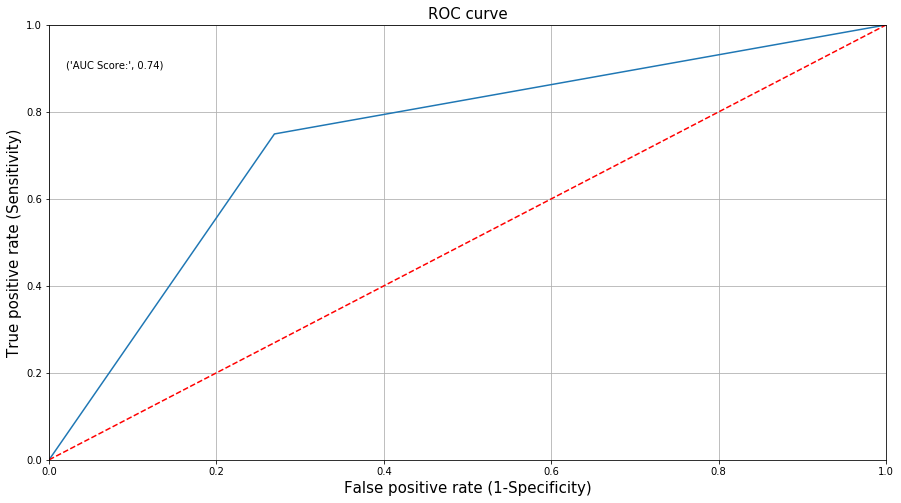

In [162]:
plot_roc_balanced_rfe(gnb_balanced_RFE,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [163]:
update_final_score_card_balanced_rfe(gnb_balanced_RFE,'RFE_Optimized_Gaussian_Naive_Bayes_Model_Balanced',
                                    X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [164]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized KNN Model for Balanced Data

In [165]:
tuned_parameters_bal = {'n_neighbors':np.arange(1,25,2),'metric':['hamming','euclidean','manhattan']}

knn_bal_gs = KNeighborsClassifier()
knn_grid_bal = GridSearchCV(estimator = knn_bal_gs,param_grid = tuned_parameters,cv = 5,scoring = 'accuracy')

knn_grid_bal.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']],Y_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [166]:
knn_grid_bal.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

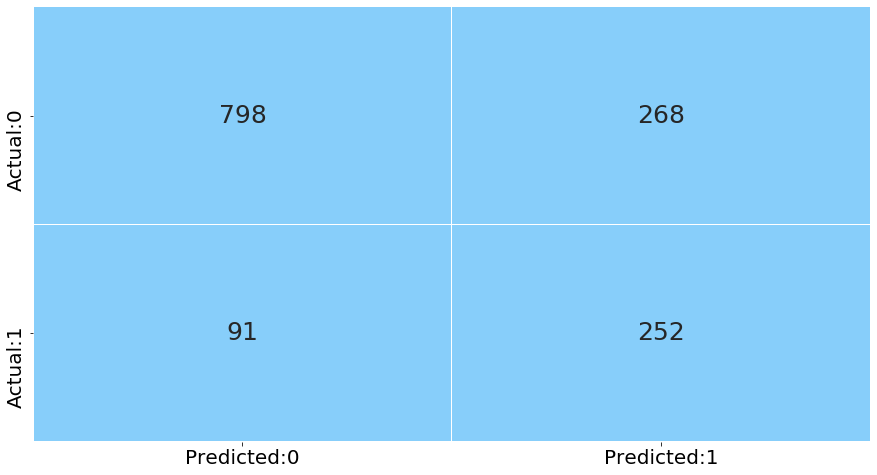

In [167]:
plot_confusion_matrix_balanced_rfe(knn_grid_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

##### From the above confusion matrix, we see that there are:

- 798 True Negatives
- 252 True Positives
- 268 False Positives
- 91 False Negatives

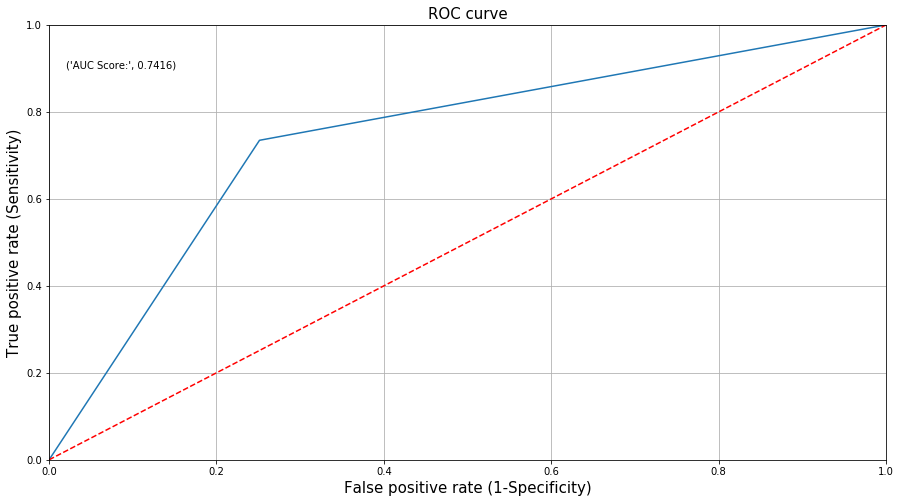

In [168]:
plot_roc_balanced_rfe(knn_grid_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [169]:
update_final_score_card_balanced_rfe(knn_grid_bal,'GridSearch_Optimized_KNN_Model_Balanced',
                                    X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [170]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized Decision Tree Model for Balanced Data

In [171]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification_bal_gs = DecisionTreeClassifier(random_state = 10)

tree_grid_bal_gs = GridSearchCV(estimator = decision_tree_classification_bal_gs, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model_bal = tree_grid_bal_gs.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']], Y_sm)

print('Best parameters for decision tree classifier: ', tree_grid_model_bal.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [172]:
dt_model_bal_gs = DecisionTreeClassifier(criterion = tree_grid_model_bal.best_params_.get('criterion'),
                                  max_depth = tree_grid_model_bal.best_params_.get('max_depth'),
                                  max_features = tree_grid_model_bal.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model_bal.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model_bal.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model_bal.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model_bal = dt_model_bal_gs.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']], Y_sm)

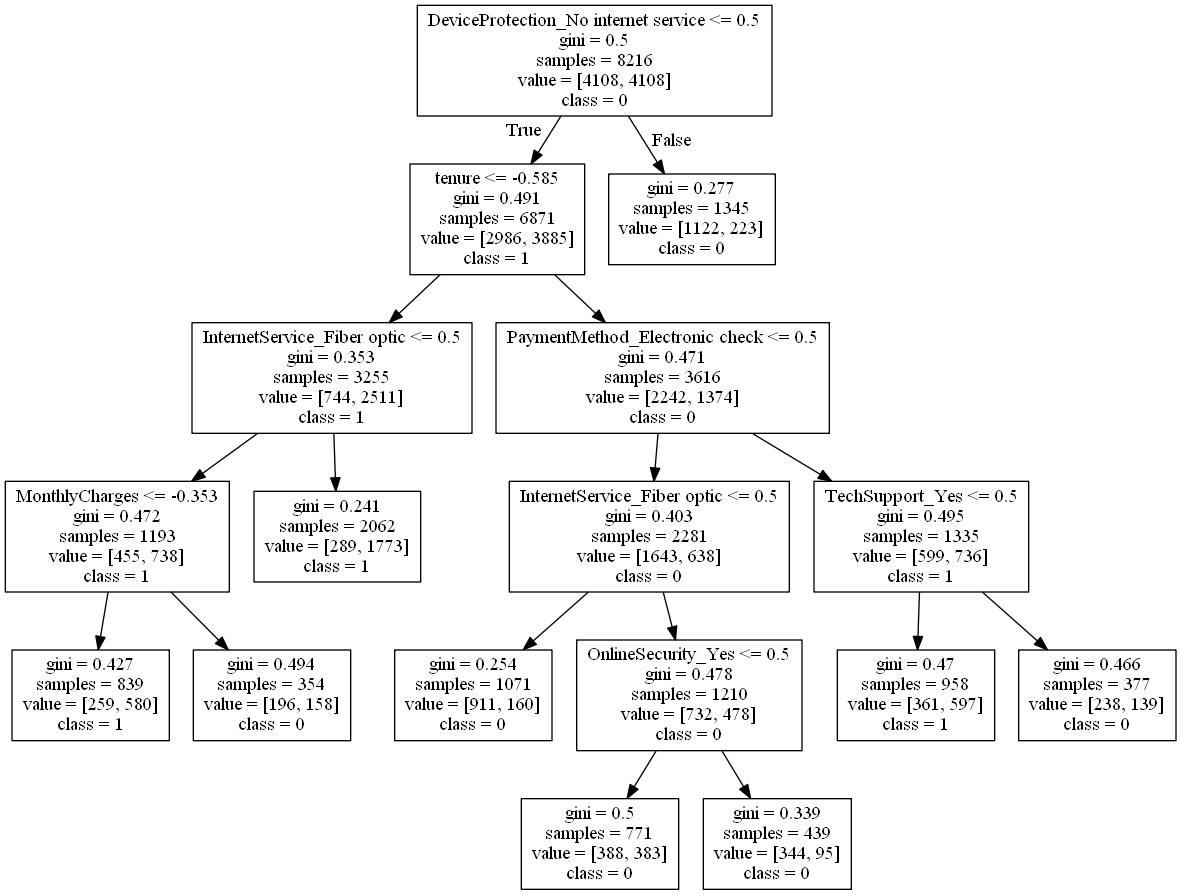

In [173]:
# save the column names in 'labels'
labels = ['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model_bal, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

# double-click on the image below to get an expanded view

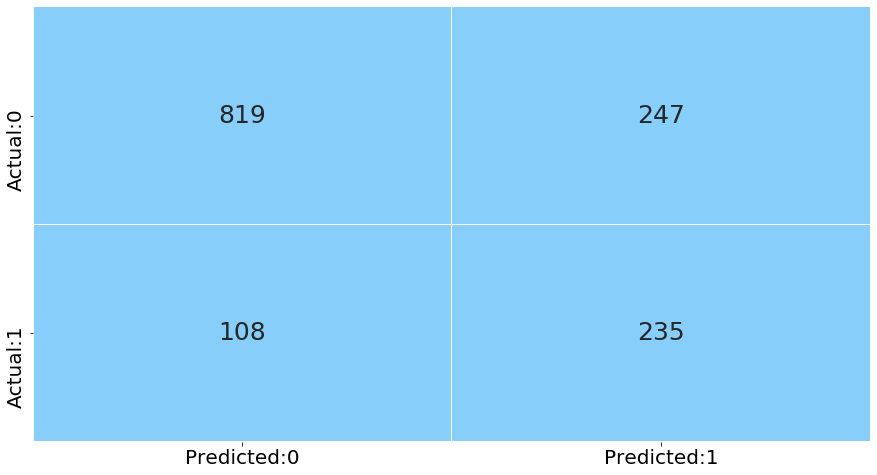

In [174]:
plot_confusion_matrix_balanced_rfe(dt_model_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

##### From the above confusion matrix, we see that there are:

- 819 True Negatives
- 235 True Positives
- 247 False Positives
- 108 False Negatives

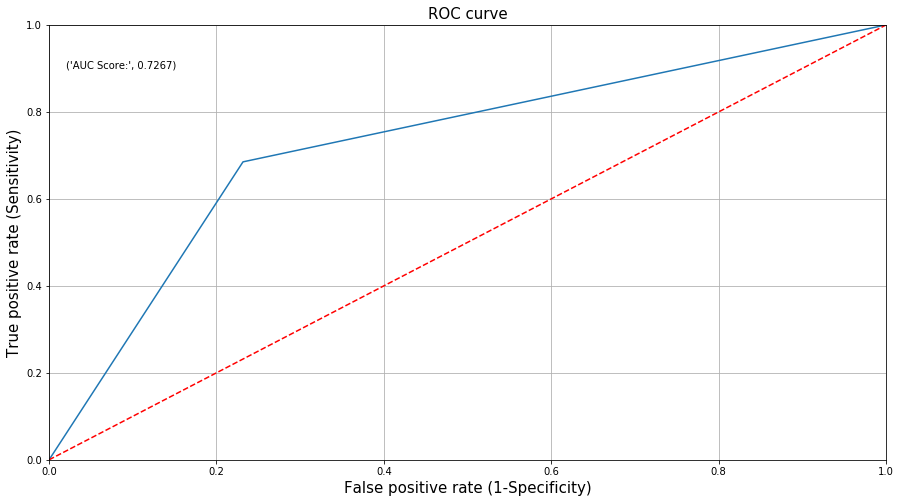

In [175]:
plot_roc_balanced_rfe(dt_model_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [176]:
update_final_score_card_balanced_rfe(dt_model_bal,'GridSearch_Optimized_Decision_Tree_Model_Balanced',
                                    X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [177]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized Random Forest Model for Balanced Data

In [178]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [3,6,9,12,15,18],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification_bal_gs = RandomForestClassifier(random_state = 10)

rf_grid_bal = GridSearchCV(estimator = random_forest_classification_bal_gs, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model_bal = rf_grid_bal.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']], Y_sm)

print('Best parameters for random forest classifier: ', rf_grid_model_bal.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 12} 



In [179]:
rf_model_bal_gs = RandomForestClassifier(criterion = rf_grid_model_bal.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model_bal.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model_bal.best_params_.get('max_depth'),
                                  max_features = rf_grid_model_bal.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model_bal.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model_bal.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model_bal.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model_bal = rf_model_bal_gs.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']], Y_sm)

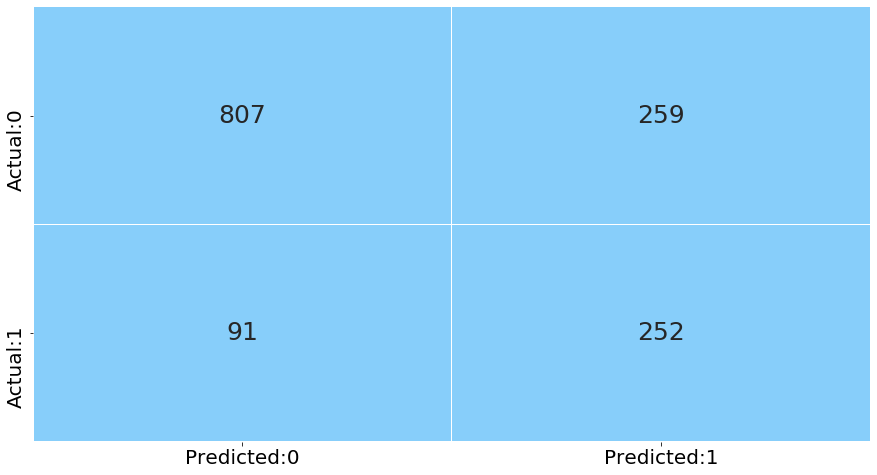

In [180]:
plot_confusion_matrix_balanced_rfe(rf_model_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

##### From the above confusion matrix, we see that there are:

- 807 True Negatives
- 252 True Positives
- 259 False Positives
- 91 False Negatives

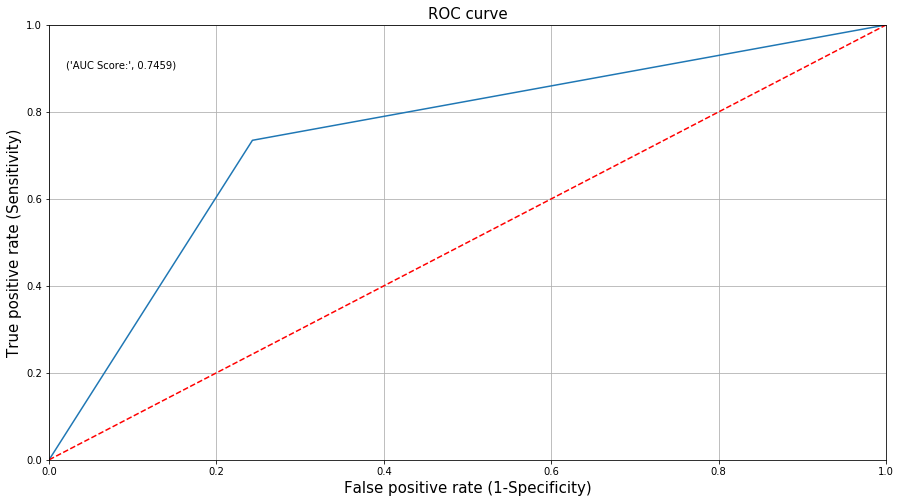

In [181]:
plot_roc_balanced_rfe(rf_model_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [182]:
update_final_score_card_balanced_rfe(rf_model_bal,'GridSearch_Optimized_Random_Forest_Model_Balanced',
                                    X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [183]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### GridSearch Optimized XGBoost Model for Balanced Data

In [184]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model_bal_gs = XGBClassifier()

xgb_grid_bal = GridSearchCV(estimator = xgb_model_bal_gs, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid_bal.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']], Y_sm)

print('Best parameters for XGBoost classifier: ', xgb_grid_bal.best_params_, '\n')

[17:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:58:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [185]:
xgb_grid_model_bal = XGBClassifier(learning_rate = xgb_grid_bal.best_params_.get('learning_rate'),
                               max_depth = xgb_grid_bal.best_params_.get('max_depth'),
                              gamma = xgb_grid_bal.best_params_.get('gamma'))

xgb_model_grid_optimized_bal = xgb_grid_model_bal.fit(X_sm[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']], Y_sm)

[17:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


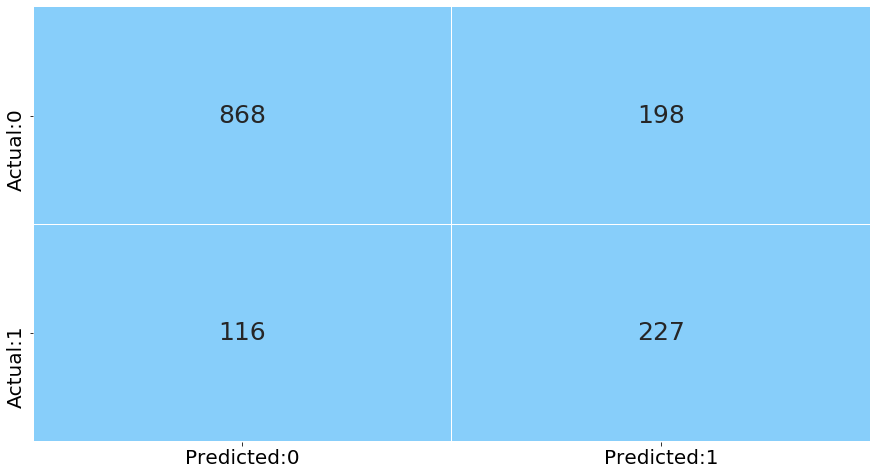

In [186]:
plot_confusion_matrix_balanced_rfe(xgb_model_grid_optimized_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

##### From the above confusion matrix, we see that there are:

- 868 True Negatives
- 227 True Positives
- 198 False Positives
- 116 False Negatives

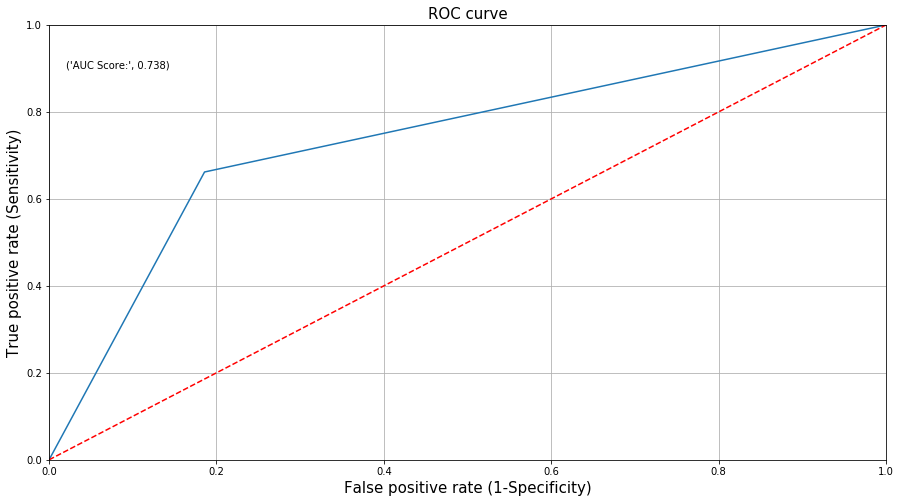

In [187]:
plot_roc_balanced_rfe(xgb_model_grid_optimized_bal,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [188]:
update_final_score_card_balanced_rfe(xgb_model_grid_optimized_bal,'GridSearch_Optimized_XGBoost_Model_Balanced',
                                    X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [189]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


### Threshold Optimization for Balanced Logistic Regression Model

In [198]:
y_pred_prob_balanced = balanced_logreg_rfe_significant_model.predict(X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])
    
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test, y_pred_prob_balanced)

In [199]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table_balanced = pd.DataFrame({'TPR': fpr_bal,
                             'FPR': tpr_bal,
                             'Threshold': thresholds_bal})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table_balanced['Difference'] = youdens_table_balanced.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.769679,0.249531,0.292202,0.520148
1,0.772595,0.254221,0.287641,0.518373
2,0.766764,0.248593,0.294893,0.518171
3,0.766764,0.249531,0.293979,0.517233
4,0.760933,0.243902,0.301157,0.517031


In [200]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden_balanced = [ 0 if x < 0.29 else 1 for x in y_pred_prob_balanced]

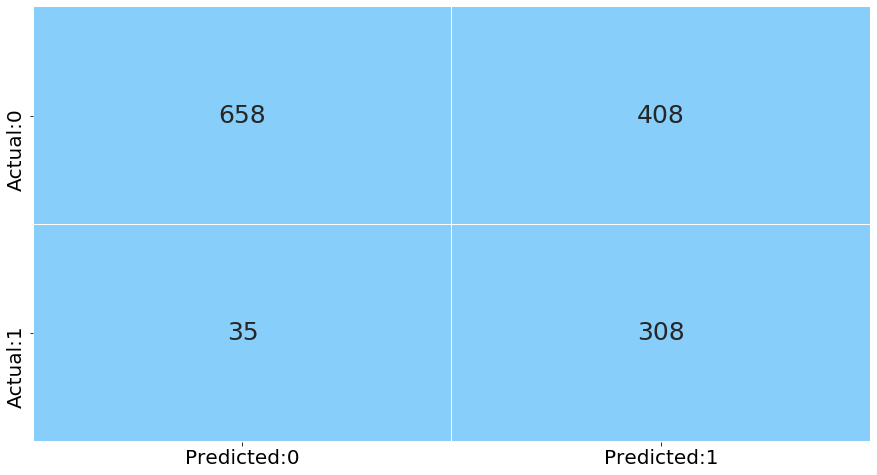

In [201]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden_balanced)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

##### From the above confusion matrix, we see that there are:

- 658 True Negatives
- 308 True Positives
- 408 False Positives
- 35 False Negatives

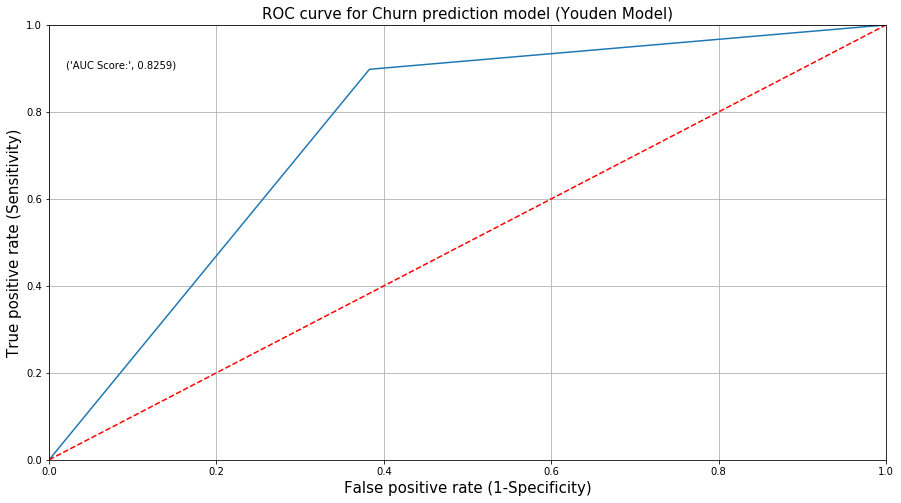

In [202]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test, y_pred_youden_balanced)

# plot the ROC curve
plt.plot(fpr_bal, tpr_bal)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Churn prediction model (Youden Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_balanced),4)))
                               
# plot the grid
plt.grid(True)

In [221]:
update_final_score_card_rfe_threshold(balanced_logreg_rfe_significant_model,'Threshold_Optimized_Logistic_Regression_Balanced_Model',
                                     0.29,X_test[['const','MonthlyCharges', 'PhoneService_Yes',
       'MultipleLines_Yes', 'Partner_Yes','InternetService_Fiber optic', 'Contract_One year', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service','DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Two year','tenure','TotalCharges','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

In [226]:
final_score_card

,Model Name,Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,Base_Logistic_Regression_model,0.806955,0.616393,0.548105,0.455460,0.580247,0.843278
1,RFE_Optimized_Logistic_Regression_model,0.807665,0.616883,0.553936,0.459129,0.583717,0.842226
2,Threshold_Optimized_Logistic_Regression_Model,0.753726,0.496241,0.769679,0.436675,0.603429,0.842226
3,Base Gaussian Model,0.638751,0.389628,0.854227,0.301662,0.535160,0.711823
4,RFE_Optimized_Gaussian_Model,0.718240,0.452297,0.746356,0.373255,0.563256,0.727774
5,Base KNN Model,0.751597,0.490765,0.542274,0.348808,0.515235,0.680612
6,RFE_Optimized_KNN_Model,0.772179,0.531250,0.545190,0.386962,0.538129,0.695203
7,GridSearch_Optimized_KNN_Model,0.803407,0.607143,0.545190,0.447154,0.574501,0.715841
8,Base Decision Tree Model,0.745919,0.479452,0.510204,0.324901,0.494350,0.665984
9,RFE_Optimized_Decision_Tree_Model,0.747339,0.482385,0.518950,0.331261,0.500000,0.669888


##### From the above models, based on the requirement of the telecom company, it would be in their best interest to go with the Threshold Optimized Logistic Regression model for the balanced dataset, as it has the highest recall rate at 0.898, thereby helping the organization identify the potential customers who are about to churn, and minimizing the rate of false negatives.